<center><h1>ML01: Projet Titanic</h1></center>

## Introduction

Le naufrage du RMS Titanic demeure l'une des catastrophes les plus tragiques de l'histoire. Le 15 avril 1912, lors de son voyage inaugural, le Titanic a sombré après avoir heurté un iceberg, entraînant la perte de 1502 vies parmi les 2224 passagers et membres d'équipage à bord. Cette tragédie a profondément choqué le monde entier et a conduit à des améliorations significatives des normes de sécurité maritime.

L'une des raisons principales pour lesquelles le nombre de victimes a été si élevé réside dans le manque de canots de sauvetage disponibles pour les passagers et l'équipage. Bien que la survie lors du naufrage ait été en partie due à la chance, certaines catégories de personnes ont eu une probabilité plus élevée de survie, notamment les femmes, les enfants et les passagers de la classe supérieure.

Notre objectif est de développer un modèle prédictif pour identifier les passagers ayant survécu à cette tragédie, en se basant sur divers facteurs et caractéristiques des individus.

<!-- Colocar uma imgaem de um link do titanico centralizada -->

<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1280px-RMS_Titanic_3.jpg" width="500" height="500" />
</center>



| Variable  | Description                                    |
|-----------|------------------------------------------------|
| survival  | Survival (0 = No; 1 = Yes)                       |
| pclass    | Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)      |
| name      | Name                                             |
| sex       | Sex                                              |
| age       | Age                                              |
| sibsp     | Number of Siblings/Spouses Aboard                |
| parch     | Number of Parents/Children Aboard                |
| ticket    | Ticket Number                                    |
| fare      | Passenger Fare                                   |
| cabin     | Cabin                                            |
| embarked  | Port of Embarkation   (C = Cherbourg; Q = Queenstown; S = Southampton)|


**NOTE EXPLICATIVE**

Pclass est une approximation du statut socio-économique (SSE).
 1er ~ supérieur ; 2ème ~ moyen ; 3ème ~ inférieur

L'âge est en années et est fractionnaire si l'âge est inférieur à un.
Si l'âge est estimé, il se présente sous la forme xx.5.

En ce qui concerne les variables de relations familiales (c.-à-d. sibsp et parch):certaines relations ont été ignorées.Par exemple, les membres de la famille exclus de cette étude sont les cousins,
neveux/nièces, tantes/oncles et beaux-parents.  Certains enfants ont voyagé uniquement avec une nounou, donc parch=0 pour eux.  De même, certains
ont voyagé avec des amis très proches ou des voisins dans un village, mais les définitions ne permettent pas d'établir de telles relation.
Donc les définitions utilisées pour sibsp et parch sont les suivantes:

* Frère ou sœur :  Frère, sœur, demi-frère ou demi-sœur d'un passager à bord du Titanic.
* Conjoint :   Mari ou femme du passager à bord du Titanic (les maîtresses et les fiancés sont ignorés).

* Parent :   Mère ou père du passager à bord du Titanic.

* Enfant : fils, fille, beau-fils ou belle-fille du passager à bord du Titanic.





## Imports des Librairies

In [41]:
import pandas as pd
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.patches as mpatches
from matplotlib.legend import Legend
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

# Ignorer warnings
warnings.filterwarnings("ignore")

## Visualisation des données

In [42]:
df_data = pd.read_csv('train_titanic.csv')
df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Types des données par colonnes**


In [43]:
df_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Le type "object" est une chaîne de caractères pour pandas, ce qui pose des problèmes avec les algorithmes du machine learning.  Si nous voulons les utiliser comme caractéristiques, nous devrons les convertir en représentations numériques.

**Informations élémentaires**

In [44]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Statistiques descriptives**

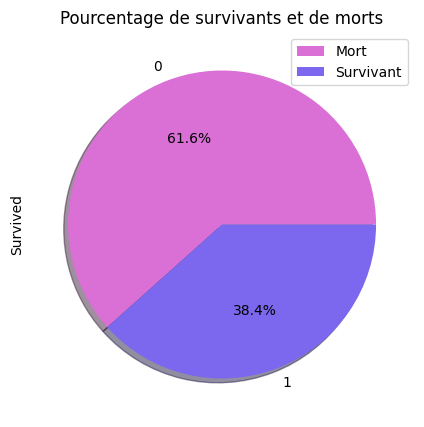

In [45]:
df_data['Survived'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,5),colors=['orchid','mediumslateblue'])
plt.title('Pourcentage de survivants et de morts')
plt.legend(['Mort','Survivant'])
plt.show()

Le graphique ci-dessus nous indique que d'après notre base de données, il y a 61,6% de passagers du Titanic qui sont morts contre 38,4% qui sont vivants. Il est interressant de se rendre compte qu'il y a plus de personnes qui sont mortes que de personnes vivantes.

In [46]:
df_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Les informations fournies ci dessus sont un résumé statistique des données contenues dans notre base d'apprentissage.

* "count" indique le nombre d'observations pour chaque variable.

* "mean" représente la moyenne des valeurs pour chaque variable.

* "std" est l'écart type, une mesure de la dispersion des données autour de la moyenne.

* "min" et "max" correspondent aux valeurs minimales et maximales observées dans chaque variable.

* Les quartiles (25%, 50%, 75%) indiquent les valeurs qui séparent les données en quatre parties égales. Par exemple, le 25e percentile de l'âge est de 20,1 ans, ce qui signifie que 25 % des passagers ont un âge inférieur ou égal à 20,1 ans.


Ci après nous visualiserons nos données à l'aide de représentation graphique

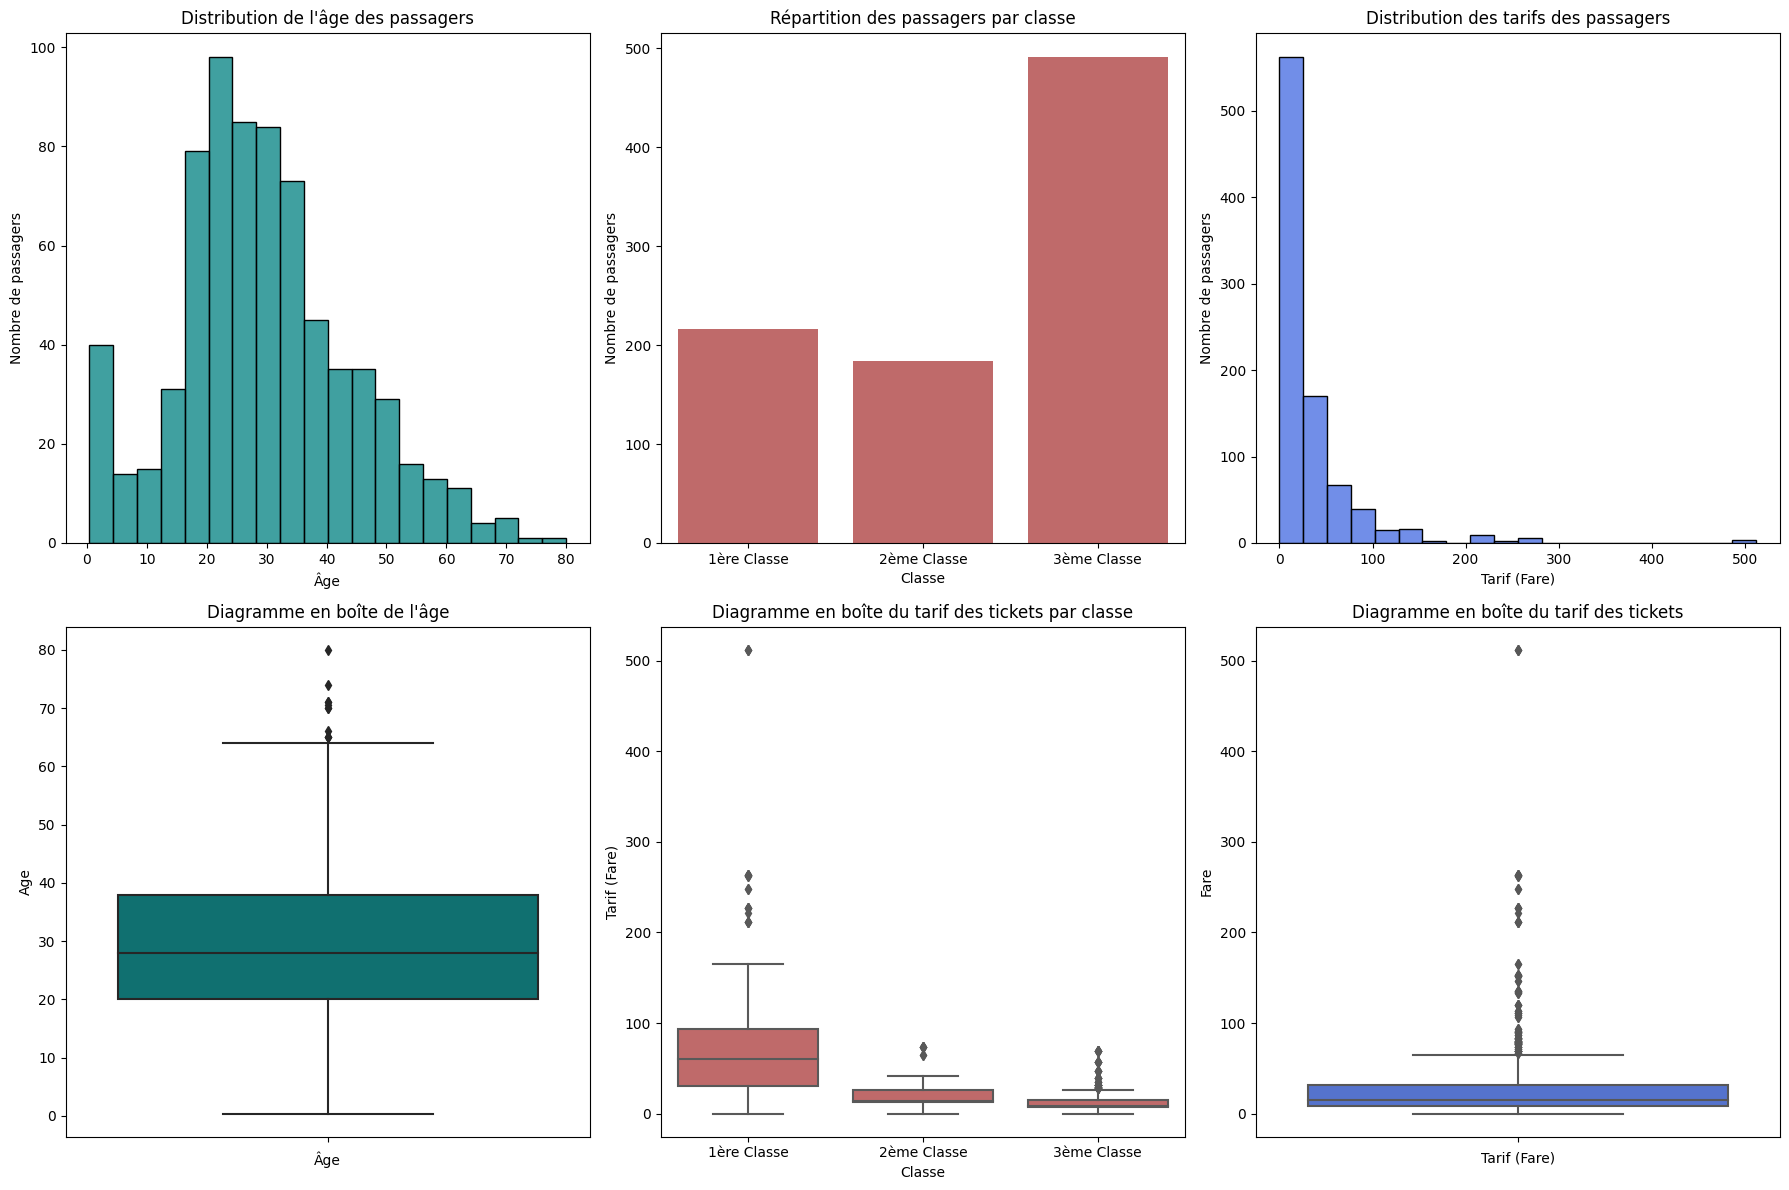

In [47]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Rangée supérieure de graphiques
# Graphique de l'âge
sns.histplot(data=df_data, x='Age', bins=20, color='#008080', ax=axes[0, 0])
axes[0, 0].set_xlabel('Âge')
axes[0, 0].set_ylabel('Nombre de passagers')
axes[0, 0].set_title('Distribution de l\'âge des passagers')

# Graphique de la classe des passagers (Pclass)
class_counts = df_data['Pclass'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts.values, color='#CD5C5C', ax=axes[0, 1])
axes[0, 1].set_xlabel('Classe')
axes[0, 1].set_ylabel('Nombre de passagers')
axes[0, 1].set_title('Répartition des passagers par classe')
axes[0, 1].set_xticklabels(['1ère Classe', '2ème Classe', '3ème Classe'])

# Graphique de fare
sns.histplot(data=df_data, x='Fare', bins=20, color='#4169E1', ax=axes[0, 2])
axes[0, 2].set_xlabel('Tarif (Fare)')
axes[0, 2].set_ylabel('Nombre de passagers')
axes[0, 2].set_title('Distribution des tarifs des passagers')

# Rangée inférieure de graphiques
# Diagramme en boîte de l'âge
sns.boxplot(data=df_data, y='Age', color='#008080', ax=axes[1, 0])
axes[1, 0].set_xlabel('Âge')
axes[1, 0].set_title('Diagramme en boîte de l\'âge')

sns.boxplot(data=df_data, x='Pclass', y='Fare', color='#CD5C5C', ax=axes[1, 1])
axes[1, 1].set_xlabel('Classe')
axes[1, 1].set_ylabel('Tarif (Fare)')
axes[1, 1].set_title('Diagramme en boîte du tarif des tickets par classe')
axes[1, 1].set_xticklabels(['1ère Classe', '2ème Classe', '3ème Classe'])

# Diagramme en boîte de Fare
sns.boxplot(data=df_data, y='Fare', color='#4169E1', ax=axes[1, 2])
axes[1, 2].set_xlabel('Tarif (Fare)')
axes[1, 2].set_title('Diagramme en boîte du tarif des tickets')

plt.tight_layout()
plt.show()

La distribution des âges des passagers du Titanic présente une moyenne de 29.7 ans, avec une plage allant de 0.42 à 80 ans. La majorité des passagers ont une tranche d'âge située entre 20.1 ans (25e percentile) et 38 ans (75e percentile), tandis que la médiane (50e percentile) se situe à 28 ans.

En ce qui concerne la répartition par classe, on constate que la majorité des passagers sont en classe 3, avec une moyenne de classe à 2.3. Cela suggère une diversité dans les classes, mais avec une prédominance relative de la classe 3.

Quant à la distribution des tarifs des passagers, la moyenne est de 32.2, avec des valeurs allant de 0 à 512.33. Les tarifs semblent être variés, avec une concentration autour des valeurs plus basses, comme indiqué par le 25e percentile à 7.91 et le 50e percentile à 14.45. Cependant, la présence de valeurs plus élevées suggère également la présence de tarifs plus élevés pour certains passagers.

En résumé, la distribution de l'âge, la répartition par classe et la distribution des tarifs des passagers reflètent la diversité des passagers à bord du Titanic, avec des variations significatives dans chaque catégorie.


**Corrélation entre les variables**

Comprendre la matrice de corrélation des variables est essentiel pour analyser les relations entre les différentes caractéristiques d'un ensemble de données. Dans le graphique ci-dessus, une matrice de corrélation a été créée pour le dataframe "df_train." Cette matrice de corrélation permet de visualiser la force et la direction des relations linéaires entre les variables.

Les points clés à retenir à partir de la matrice de corrélation sont les suivants :

* **Valeurs de Corrélation** : Les valeurs se situent dans la plage de -1 à 1. Une valeur de 1 indique une corrélation positive parfaite, ce qui signifie que lorsque la variable A augmente, la variable B augmente également. Une valeur de -1 indique une corrélation négative parfaite, ce qui signifie que lorsque la variable A augmente, la variable B diminue. Une valeur proche de 0 suggère une faible corrélation.

* **Coloration** : Les couleurs dans la matrice de corrélation indiquent le degré de corrélation. Les tons plus clairs représentent une corrélation positive, tandis que les tons plus foncés représentent une corrélation négative.

*  **Annotations** : Les chiffres dans chaque cellule de la matrice indiquent la valeur de corrélation entre les variables correspondantes. Une annotation proche de 1 ou -1 indique une forte corrélation, tandis qu'une annotation proche de 0 indique une faible corrélation.

*  **Analyse des Relations** : En utilisant cette matrice, il est possible d'identifier quelles paires de variables sont fortement corrélées. Si deux variables ont une corrélation positive proche de 1, cela suggère qu'elles augmentent ensemble, tandis qu'une corrélation négative proche de -1 indique qu'elles évoluent en sens opposé. Par exemple, les variables "Sibp" et "Parch" sont les plus corrélées ainsi que les variables "Fare" et "Pclass".



<Axes: >

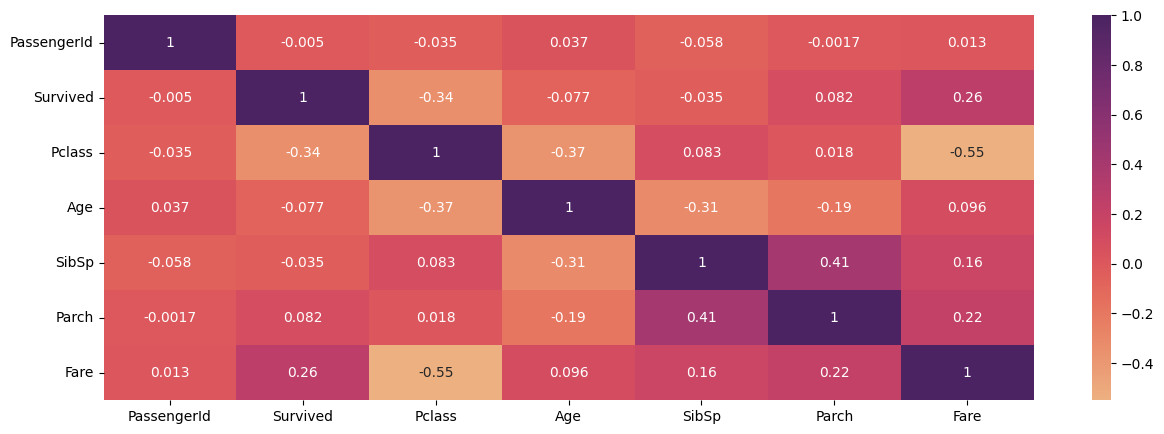

In [48]:
plt.figure(figsize=(15, 5))
custom_palette = sns.color_palette("flare", as_cmap=True)
sns.heatmap(df_data.corr(), annot=True, cmap=custom_palette)

<!-- Petit text pour parler sur les correlations entre noitre variable depedent (Survived et les autres) -->

À travers la carte de corrélation de notre base de données, nous pouvons identifier les variables ayant le plus grand impact et présentant une corrélation avec notre variable de classe(Survived). Notamment, nous constatons que la variable de classe ne montre pas de corrélation significative avec les autres variables indépendantes de notre base de données. Il est à noter que la corrélation la plus élevée identifiée concerne la variable Fare, avec un coefficient de 0,26

Nous souhaitons à présent visualiser la distribution des tarifs des passagers en fonction de la survie. En effet, d'après notre matrice de corrélation, nous avons identifié la variable "Fare" comme celle qui influence le plus la classe à laquelle appartient une observation. Il est donc pertinent de voir le nombres de survivants et de morts par rapport au tarif des tickets.
L'histogramme réaliser ci-dessous nous permet de bien visualiser cette distribution.

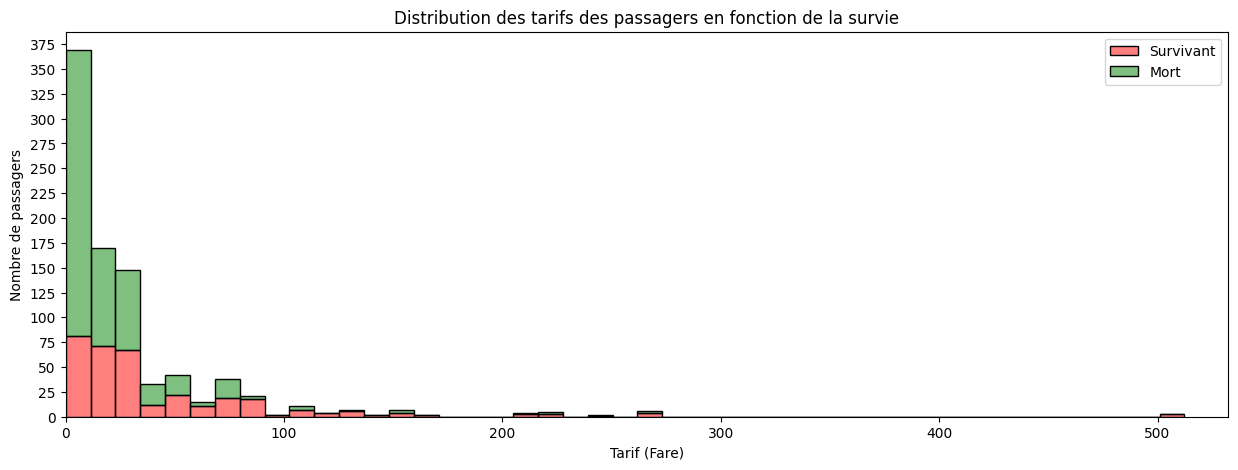

In [49]:
# graphique histogramme qui permet de visualiser la distribution des survivants et morts par rapport aux tarifs des tickets.
plt.figure(figsize=(15, 5))
plt.xlim(0, df_data['Fare'].max() + 20)
plt.yticks(np.arange(0, 500, 25))

sns.histplot(data=df_data, x='Fare', hue='Survived', bins=45, palette=['green','red'],alpha=0.5,multiple='stack')
plt.title('Distribution des tarifs des passagers en fonction de la survie')
plt.xlabel('Tarif (Fare)')
plt.ylabel('Nombre de passagers')
plt.legend(['Survivant','Mort'])
plt.show()


Maintenant que nous avons une idée générale du contenu de l'ensemble de données, nous pouvons approfondir l'aperçu de chaque colonne.  Nous allons effectuer une analyse exploratoire des données et les "nettoyer" afin de définir les caractéristiques que nous utiliserons dans nos algorithmes de machine learning.


## Prétraitement des données

**Suppression des Colonnes "Name", "PassengerID", "Ticket"**

La suppression des colonnes 'Name', 'PassengerID'et 'Ticket' est justifiée par leur nature redondante et leur manque de pertinence pour notre analyse. Les noms des passagers, les identifiants uniques et les numéros de billets ne contiennent pas d'informations utiles pour notre étude car ce sont pour la plupart de simples identifiants. En les éliminant, nous simplifions notre jeu de données et pouvons nous concentrer sur les caractéristiques clés ayant un impact sur nos résultats.

In [51]:
df_data = df_data.drop (['Name','PassengerId','Ticket'], axis = 1)

**Gestion des Valeurs Manquantes dans notre Ensemble de Données**

Il apparaît que dans notre ensemble de données, les colonnes "Age", "Cabin" et "Embarked" contiennent des valeurs manquantes. En particulier, la colonne "Cabine" affiche un nombre significatif de valeurs manquantes, soit 687 au total, ce qui la rend difficile à utiliser de manière significative. Par conséquent, nous envisageons de supprimer complètement cette colonne de notre analyse.

Pour les colonnes "Age" et "Embarked", nous avons une approche différente. Les valeurs manquantes dans la colonne "Age" peuvent être estimées en utilisant des méthodes telles que la  la médiane. Cela nous permettra de remplir ces valeurs manquantes avec des estimations raisonnables de l'âge des passagers.

Quant à la colonne "Embarked" (port d'embarquement), nous pouvons remplir les valeurs manquantes en utilisant la valeur la plus courante (le port le plus fréquent) .

En résumé, nous prévoyons de supprimer la colonne "Cabin" en raison du grand nombre de valeurs manquantes, et pour les colonnes "Age" et "Embarked", nous utiliserons des techniques d'imputation pour remplir les valeurs manquantes de manière à ce que notre analyse puisse se poursuivre de manière significative.

In [52]:
# Vérifiez si la colonne Cabin existe, et si c'est le cas, nous la supprimons
if 'Cabin' in df_data.columns:
    df_data = df_data.drop (['Cabin'], axis = 1)

# Remplacement des valeurs manquantes dans la colonne Age par la médiane
median_age = df_data['Age'].median()
df_data['Age'].fillna(median_age, inplace=True)

# Remplacement des valeurs manquantes dans la colonne Embarked par la valeur la plus fréquente
most_frequent_embarked = df_data['Embarked'].value_counts().index[0]
df_data['Embarked'].fillna(most_frequent_embarked, inplace=True)

df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB



**Transformation des Variables Qualitatives en Quantitatives :**

Dans le cadre de notre analyse de données, il est crucial de convertir les variables qualitatives en variables quantitatives. Les variables qualitatives, telles que le sexe et le port d'embarquement, sont des informations importantes, mais la plupart des algorithmes d'apprentissage automatique exigent que les données d'entrée soient numériques.

Pour que nos modèles puissent traiter ces informations, nous utilisons une approche de transformation. Plutôt que d'utiliser le LabelEncoder, qui attribue des identifiants numériques uniques à chaque catégorie des variables qualitatives, nous optons pour le One-Hot Encoding. Le One-Hot Encoding crée des colonnes binaires distinctes pour chaque catégorie, attribuant ainsi 0 ou 1 en fonction de la présence de la catégorie dans une observation. Par exemple, la variable 'Sex' avec les catégories 'Male' et 'Female' serait transformée en deux nouvelles colonnes 'Sex_Male' et 'Sex_Female'. Cette approche permet aux algorithmes de comprendre et d'utiliser ces données qualitatives de manière significative, sans introduire d'ordre artificiel entre les catégories.

In [53]:
df_data = pd.get_dummies(df_data, columns=["Sex", "Embarked"], prefix=["Sex", "Embarked"])

In [54]:
df_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


**Mise à l'échelle**

Elle est nécessaire pour garantir que les différentes variables caractéristiques de notre jeuu de données ont des échelles comparables. Sans mise à l'échelle, les caractéristiques qui ont des échelles très différentes peuvent biaiser négativement nos algorithmes d'apprentissage automatique, en particulier ceux qui se basent sur des mesures de distance ou qui effectuent des calculs numériques.

Lorsque des caractéristiques ont des échelles différentes, cela signifie que certaines d'entre elles peuvent avoir une influence disproportionnée sur les résultats de l'algorithme par rapport à d'autres caractéristiques. La mise à l'échelle permet de ramener toutes les caractéristiques à une même échelle, généralement avec une moyenne de 0 et un écart type de 1. Cela garantit que chaque caractéristique contribue de manière équilibrée aux calculs, améliorant ainsi la performance et l'interprétabilité des modèles d'apprentissage automatique.



In [55]:
std = StandardScaler()

columns = ['Age', 'Fare']
scaled = std.fit_transform(df_data[columns])

# Création d'un nouveau DataFrame avec les données mises à l'échelle
scaled = pd.DataFrame(scaled, columns=columns)

# Suppression des colonnes 'Age' et 'Fare'
df = df_data.drop(columns=columns, axis=1)

# Fusion des données mises à l'échelle avec le DataFrame d'origine
df = df.merge(scaled, left_index=True, right_index=True, how="left")

df.head()

,Survived,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,Fare
0,0,3,1,0,0,1,0,0,1,-0.565736,-0.502445
1,1,1,1,0,1,0,1,0,0,0.663861,0.786845
2,1,3,0,0,1,0,0,0,1,-0.258337,-0.488854
3,1,1,1,0,1,0,0,0,1,0.433312,0.420730
4,0,3,0,0,0,1,0,0,1,0.433312,-0.486337


**Division de la base de données en base d'apprentissage et de test**

Nous divisons l'ensemble de données en deux ensembles distincts : l'ensemble d'entraînement et l'ensemble de test. L'ensemble d'entraînement est utilisé pour former le modèle, tandis que l'ensemble de test est réservé pour évaluer sa performance. Cette séparation est essentielle pour simuler la manière dont le modèle se comportera sur de nouvelles données inconnues. En effet, l'objectif est de s'assurer que le modèle peut généraliser ses connaissances au-delà des données sur lesquelles il a été formé.

Avec la séparation des données en ensembles d'entraînement et de test, nous appliquons des techniques de validation croisée pendant la modélisation. En fin de compte, nous utilisons l'ensemble de test pour l'évaluation. Cette procédure aide à prévenir le surajustement aux données de test, offrant ainsi une évaluation plus réaliste des performances du modèle sur de nouvelles données

Les lignes de code ci-dessous  réalisent plusieurs étapes cruciales dans la préparation des données pour un modèle de classification. Tout d'abord, la variable cible 'Survived' est isolée et stockée dans un nouveau DataFrame appelé 'YRdf'. Ensuite, cette variable cible est convertie en un tableau numpy unidimensionnel, où chaque élément est augmenté de 1 pour ainsi avoir comme classe associée 1 ou 2, à la place de 0 et 1. Quant aux variables descriptives X, elles sont conservées mais on a bien supprimé la colonne 2survived"qui représentait les classes des observations.

L'ensemble de données est divisé en ensembles d'entraînement (X_train, y_train) et de test (X_test, y_test) à l'aide de la fonction `train_test_split`, avec 30% des données réservées pour les tests et une graine aléatoire assurant la reproductibilité.

 Le nombre de classes (K) est déterminé en trouvant la valeur maximale dans les labels (ici K sera donc égale à 2 puisqu'on a dorénavant soit la classe 1 soit la classe 2).
  Enfin, la matrice L de coût ou de pertes est créée: les éléments diagonaux sont nuls et les autres sont établis à 1.

In [56]:
#Selection de la colomne Survived pour définir notre vecteur de classes
y = df['Survived'].values

# ajouter un a chaque élement de y(pour avoir des classes de 1 et 2)
YR = y + 1

# On supprime la colomne y pour obtenir le vecteur X des variables descriptives
X = df.drop(['Survived'], axis=1).values

# On sépare notre base de données en base d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train += 1

K = int(np.max(YR))

# Fonction de perte L0-1
L = np.ones((K, K)) - np.eye(K)


## Visualisation des points dans un esapce en deux dimensions

[Text(0.5, 1.0, 'T-SNE projection')]

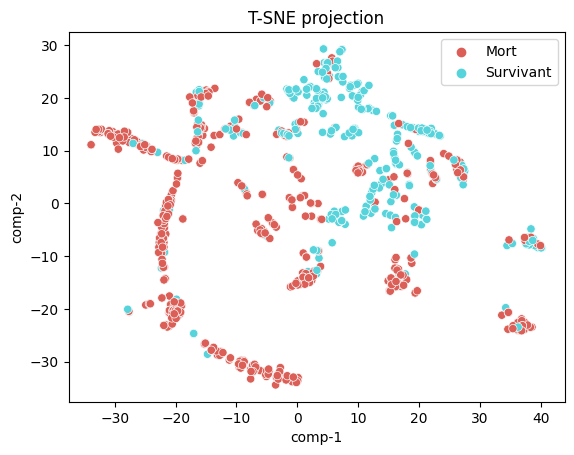

In [57]:

# Projection de tous les points dans un espace de dimension 2
tsne = TSNE(n_components=2, verbose=0, random_state=123)
z = tsne.fit_transform(X)

df = pd.DataFrame()
df['y'] = YR
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

leg = ['Mort' if value == 1 else 'Survivant' for value in df.y.tolist()]

sns.scatterplot(x="comp-1", y="comp-2", hue=leg,
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection")

Dans le cadre de notre projet d'analyse de données, nous disposons d'un fichier dédié, nommé functions.ipynb, qui renferme un ensemble de fonctions spécialement conçues pour l'analyse des données. Ces fonctions ont été développées de manière à faciliter et à optimiser les différentes étapes de notre processus d'analyse.

In [58]:
run functions.ipynb

## K-Nearest-Neighbours (KNN)

Nous allons maintenant utiliser le classificateur KNN (K-Nearest Neighbors), une technique d'apprentissage supervisé. Le KNN est un algorithme qui classe un point de données en fonction de la majorité des classes de ses voisins les plus proches. En résumé, il prend en compte la proximité entre les données pour effectuer des prédictions. Dans notre approche, nous intégrerons la validation croisée pour évaluer les performances du modèle et déterminer la meilleure configuration de voisins les plus proches qui s'adapte aux données.

In [59]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(407)

nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

stock_kn = np.array([1, 10, 20, 30, 40, 50, 100])
nb_kn = stock_kn.shape[0]
stock_average_risk_Train = np.zeros((nbFolds, nb_kn))
stock_average_risk_Val = np.zeros((nbFolds, nb_kn))

min_diff_kn = None
min_diff = float('inf')

for f, (train, val) in enumerate(kfSplit):
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    for t, kn in enumerate(stock_kn):
        model_KNN = KNeighborsClassifier(n_neighbors=kn, metric='euclidean')
        model_KNN.fit(XTrain, YRTrain.ravel())

        YhatTrainKNN = model_KNN.predict(XTrain)
        stock_average_risk_Train[f, t] = compute_average_risk(YRTrain, YhatTrainKNN, K, L)

        YhatValKNN = model_KNN.predict(XVal)
        stock_average_risk_Val[f, t] = compute_average_risk(YRVal, YhatValKNN, K, L)

        # Track the minimum difference between training and validation curves
        diff = abs(np.mean(stock_average_risk_Train, 0)[t] - np.mean(stock_average_risk_Val, 0)[t])
        if diff < min_diff:
            min_diff = diff
            min_diff_kn = kn

### Analyse des résultats KNN

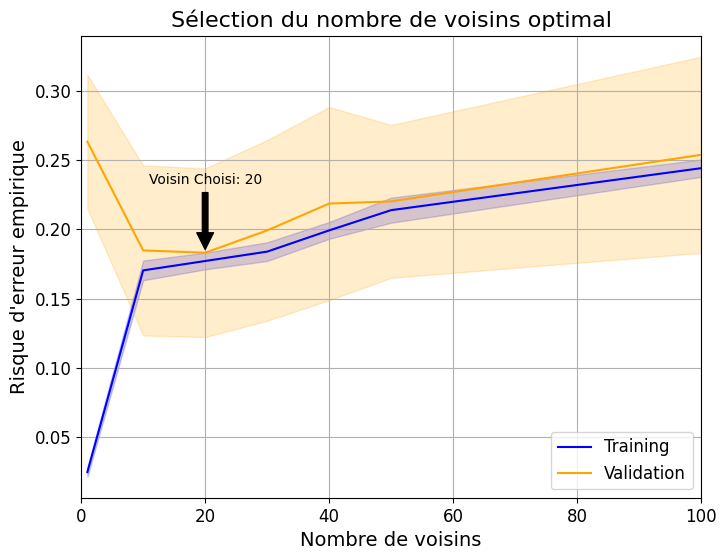

In [60]:
# Afficher les courbes d'erreur moyenne
plt.figure(figsize=(8, 6))
sns.lineplot(x=stock_kn, y=np.mean(stock_average_risk_Train, 0), label='Training', color='blue')
sns.lineplot(x=stock_kn, y=np.mean(stock_average_risk_Val, 0), label='Validation', color='orange')

plt.fill_between(stock_kn,
                 np.mean(stock_average_risk_Train, 0) - np.std(stock_average_risk_Train, 0),
                 np.mean(stock_average_risk_Train, 0) + np.std(stock_average_risk_Train, 0),
                 color='blue', alpha=0.2)

plt.fill_between(stock_kn,
                 np.mean(stock_average_risk_Val, 0) - np.std(stock_average_risk_Val, 0),
                 np.mean(stock_average_risk_Val, 0) + np.std(stock_average_risk_Val, 0),
                 color='orange', alpha=0.2)

# Trouver l'index avec la plus petite différence
min_diff_index = np.argmin(np.abs(np.mean(stock_average_risk_Train, 0) - np.mean(stock_average_risk_Val, 0)))
min_diff_kn = stock_kn[min_diff_index]

# Annoter le point où il y a la différence minimale
plt.annotate(f'Voisin Choisi: {min_diff_kn}',
             xy=(min_diff_kn, np.mean(stock_average_risk_Val, 0)[min_diff_index]),
             xytext=(min_diff_kn, np.mean(stock_average_risk_Val, 0)[min_diff_index] + 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, ha='center')

plt.xlim(0, np.max(stock_kn))

plt.xlabel("Nombre de voisins", fontsize=14)
plt.ylabel("Risque d'erreur empirique", fontsize=14)
plt.title("Sélection du nombre de voisins optimal", fontsize=16)
plt.legend(fontsize=12, loc='lower right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

Nous avons utilisé la validation croisée pour évaluer les performances du modèle et déterminer la meilleure configuration de voisins les plus proches qui s'adapte aux données. Nous avons choisi 10 "folds" pour réaliser la validation croisée. De plus, nous avons stocké les accuracy globales et par classes afin de pouvoir les réutiliser ultérieurement et mieux interpréter nos résultats.  Le graphique ci-dessus montre les résultats de la validation croisée pour différentes valeurs de k. Nous constatons que la valeur optimale de k, c'est à dire le nombre de voisins, est de 20.




Les mesures telles que le risque moyen, le risque par classe, l'exactitude moyenne et la matrice de confusion sont calculées et stockées à chaque fois.

Les graphiques générés à la suite présentent les résultats de la validation croisée. Le premier graphique montre le risque moyen sur les ensembles d'entraînement et de validation. Le deuxième graphique présente l'exactitude moyenne sur les deux ensembles. Enfin, la matrice de confusion moyenne est affichée pour les ensembles d'entraînement et de validation.

Ces visualisations offrent un aperçu de la performance du modèle sur différents plis, permettant ainsi d'évaluer sa robustesse et sa capacité à généraliser sur des données non vues.

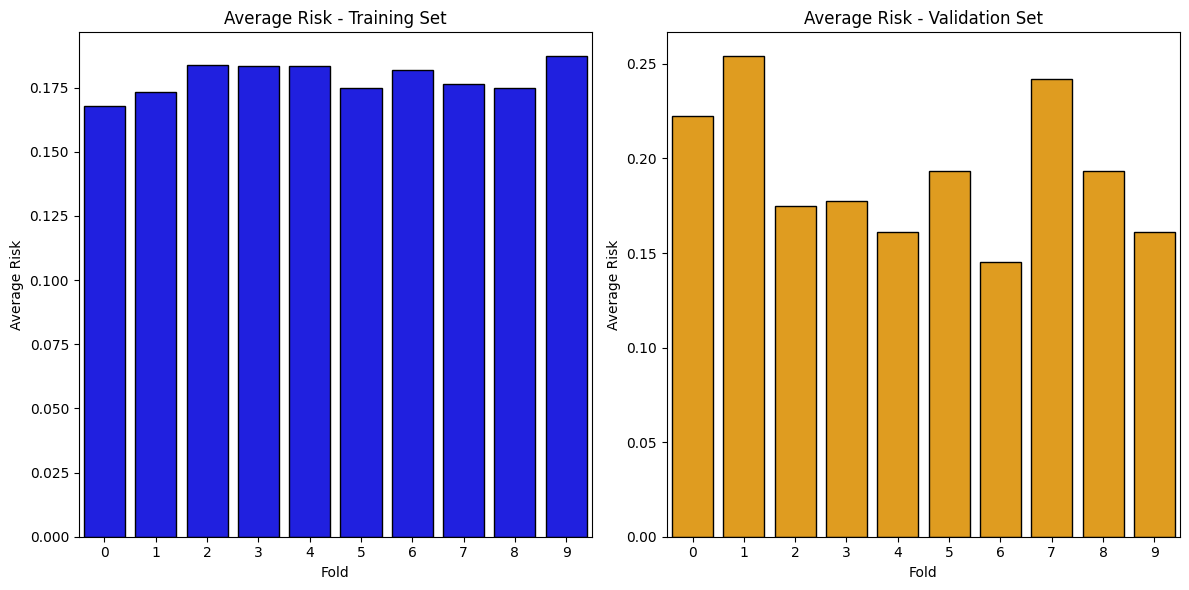

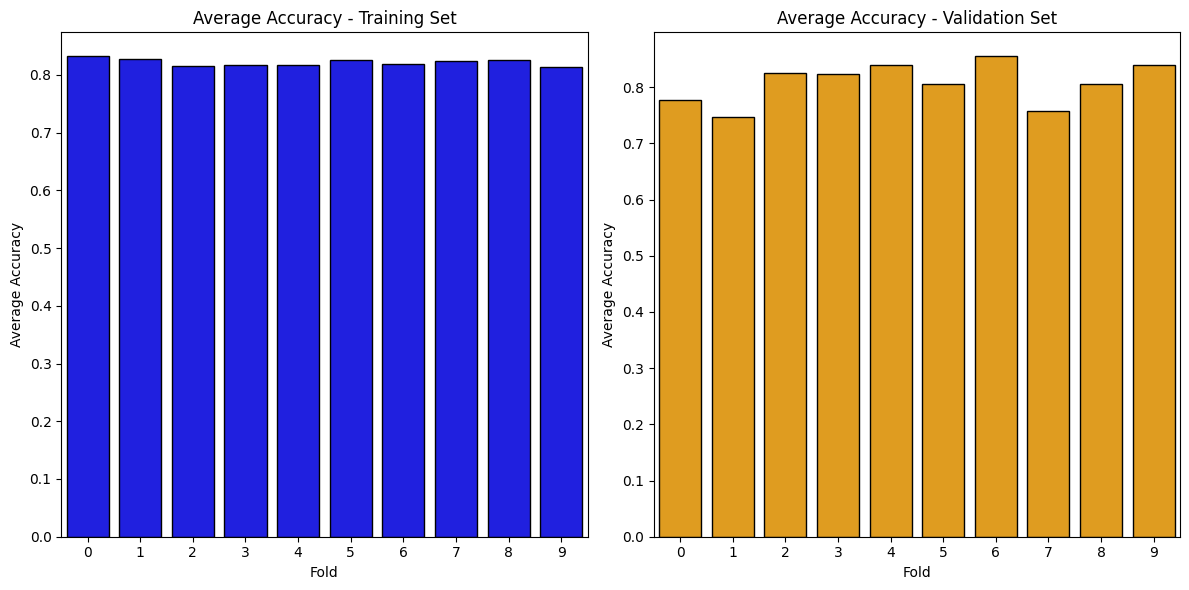

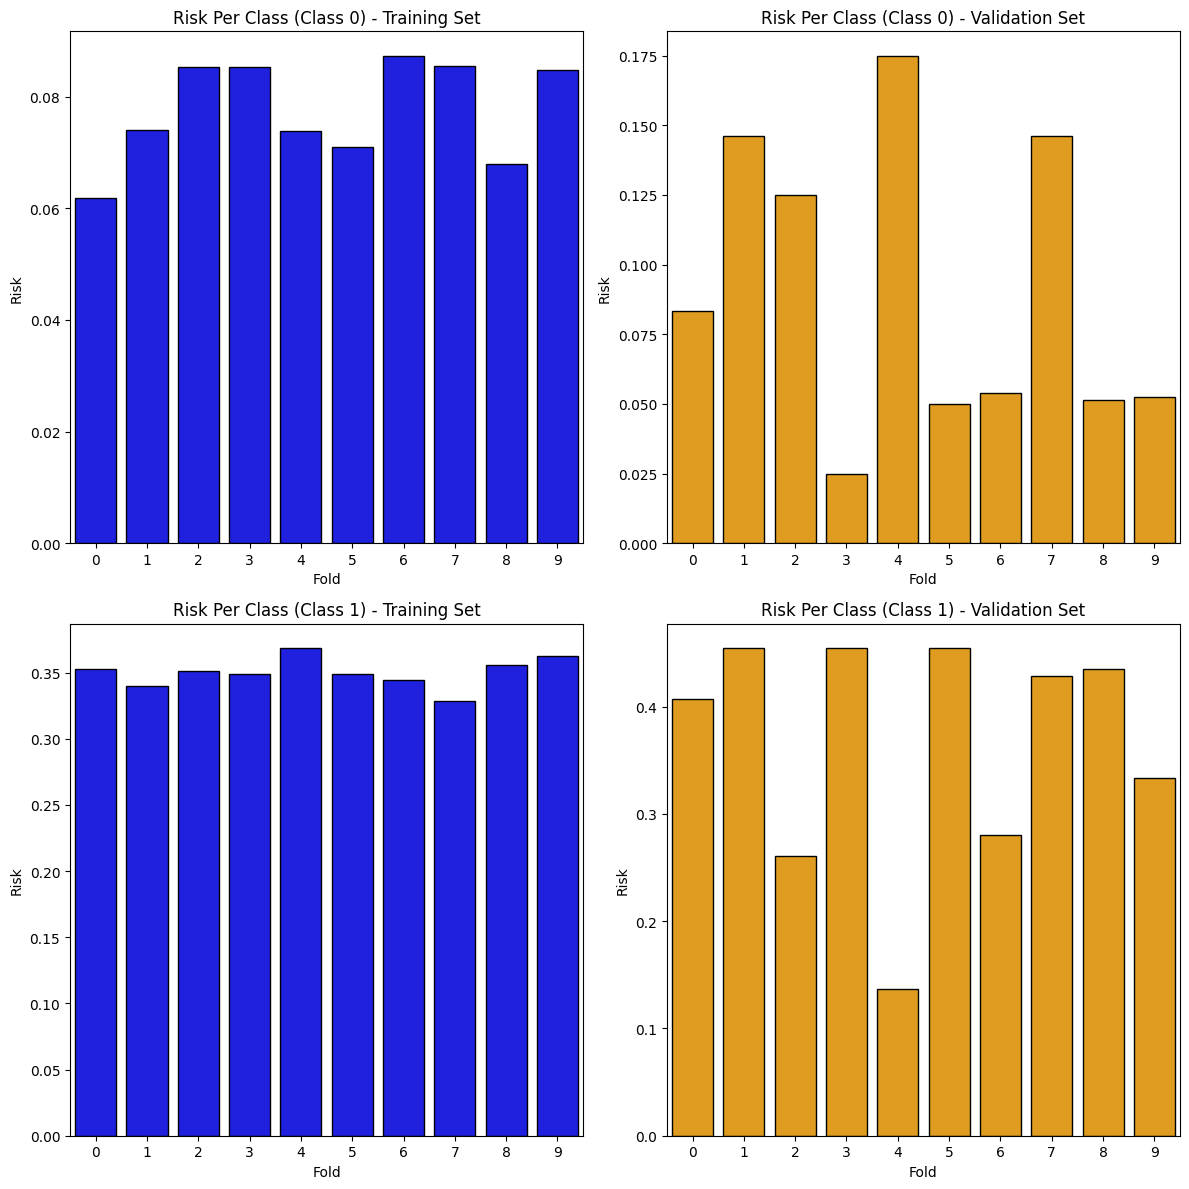

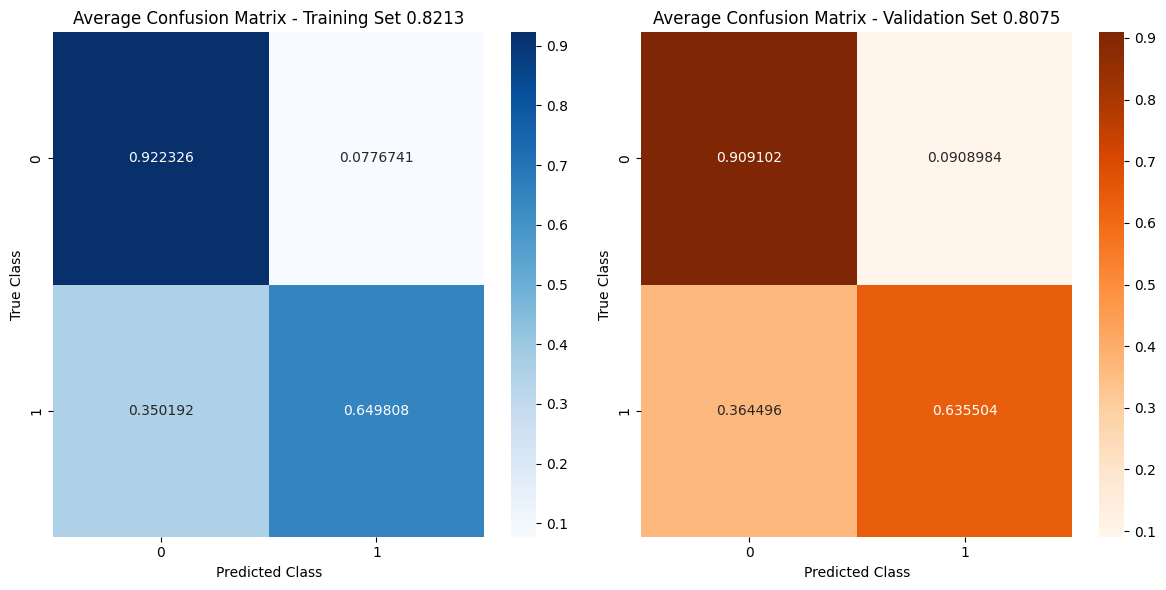

In [61]:
nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

stock_average_risk_Train = np.zeros((nbFolds, 1))
stock_average_risk_Val = np.zeros((nbFolds, 1))

stock_RiskPerClass_Train = np.zeros((nbFolds, K))
stock_RiskPerClass_Val = np.zeros((nbFolds, K))

stock_Accuracy_Train = np.zeros(nbFolds)
stock_Accuracy_Val = np.zeros(nbFolds)

stock_AccPerClass_Train = np.zeros((nbFolds, K))
stock_AccPerClass_Val = np.zeros((nbFolds, K))

stock_ConfMat_Train = np.zeros((nbFolds, K, K))
stock_ConfMat_Val = np.zeros((nbFolds, K, K))

best_fold_XTrain = None
best_fold_YRTrain = None
best_fold_YhatTrainKNN = None
max_accuracy = 0.0

f = 0
kn = 20

for train, val in kfSplit:
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    model_KNN = KNeighborsClassifier(n_neighbors=kn, metric='euclidean')
    model_KNN.fit(XTrain, YRTrain.ravel())

    YhatTrainKNN = model_KNN.predict(XTrain)
    stock_average_risk_Train[f, 0] = compute_average_risk(YRTrain, YhatTrainKNN, K, L)
    stock_RiskPerClass_Train[f, :] = compute_risk_per_class(YRTrain, YhatTrainKNN, K, L)
    stock_Accuracy_Train[f] = compute_accuracy(YRTrain, YhatTrainKNN)
    stock_AccPerClass_Train[f, :] = compute_accuracy_per_class(YRTrain, YhatTrainKNN, K)
    stock_ConfMat_Train[f, :, :] = compute_confusion_matrix(YRTrain, YhatTrainKNN, K)


    YhatValKNN = model_KNN.predict(XVal)
    stock_average_risk_Val[f, 0] = compute_average_risk(YRVal, YhatValKNN, K, L)
    stock_RiskPerClass_Val[f, :] = compute_risk_per_class(YRVal, YhatValKNN, K, L)
    stock_Accuracy_Val[f] = compute_accuracy(YRVal, YhatValKNN)
    stock_AccPerClass_Val[f, :] = compute_accuracy_per_class(YRVal, YhatValKNN, K)
    stock_ConfMat_Val[f, :, :] = compute_confusion_matrix(YRVal, YhatValKNN, K)



    accuracy_val = compute_accuracy(YRTrain, YhatTrainKNN)
    if accuracy_val > max_accuracy:
        max_accuracy = accuracy_val
        best_fold_XTrain = XTrain
        best_fold_YRTrain = YRTrain
        best_fold_YhatTrainKNN = YhatTrainKNN

    f = f + 1


# Afficher le risque moyen
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Train.ravel(), color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Val.ravel(), color='orange',ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.tight_layout()
plt.show()

# Afficher l'accuarcy moyenne
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Train, color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')


plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Val, color='orange',ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

# Aficher risk per class
plt.figure(figsize=(12, 12))

# Subplot  Classe 0 - Training Set
plt.subplot(2, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Train[:, 0], color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 0) - Training Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

# Subplot Classe 1 - Training Set
plt.subplot(2, 2, 3)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Train[:, 1], color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 1) - Training Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

# Subplot Classe 0 - Validation Set
plt.subplot(2, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Val[:, 0], color='orange', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 0) - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

# Subplot Classe 1 - Validation Set
plt.subplot(2, 2, 4)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Val[:, 1], color='orange', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 1) - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

plt.tight_layout()
plt.show()




# Afficher la matrice de confusion moyenne
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(np.mean(stock_ConfMat_Train, 0), annot=True, cmap='Blues', fmt='g')
plt.title(f'Average Confusion Matrix - Training Set {np.mean(stock_Accuracy_Train):.4f}')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.subplot(1, 2, 2)
sns.heatmap(np.mean(stock_ConfMat_Val, 0), annot=True, cmap='Oranges', fmt='g')
plt.title(f'Average Confusion Matrix - Validation Set {np.mean(stock_Accuracy_Val):.4f}')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.tight_layout()
plt.show()

Les deux premières figures indiquent le risque moyen sur l'ensemble d'entraînement (Figure 1) et l'ensemble de validation (Figure 2) pour chaque fold.

La faible variabilité sur la première figure suggère que le modèle est stable sur différents sous-ensembles de données. En effet, le risque moyen reste stable pour la base d'apprentissage se situant autour des 17,5% environ.

En ce qui concerne la deuxième figure(base de test), le risque moyen diminue d'un fold à l'autre mais augmente parfois. Si l'erreur moyen ne faisait que diminuer, cela suggèrerait une amélioration des performances. Ici, le risque diminue parfois et augmente d'autre fois. Le risque d'ereur moyen le plus élevé sur la base de test est 28% environ contre à peine 10% pour le risque moyen le plus faible.
   


Les figures 3 et 4 montrent la précision moyenne sur l'ensemble d'entraînement (Figure 3) et l'ensemble de validation (Figure 4) pour chaque fold.

L'accuracy au niveau de la base d'entraînement et très stable, autour des 80%. En ce qui concerne la base d'apprentissage, elle varie d'avantage mais cela reste tres convenable. En effet, l'accuracy pour l'ensemble de validation fluctue entre environ 70% et plus de 90% environ.

En ce qui concerne les deux figres suivantes (Figures 5 et 6), elles montrent les risques pour la classe 0, soit les personnes "mortes". Sur la base d'entraînement, le risque varie légèrement autour de 8%, ce qui peut être considéré comme relativement convenable. Néanmoins, sur la base de test le risque pour la classe  fluctue d'avantage entre 2.5% et 17.5%.

Ensuite viennent les figures 7 et 8 qui concernent les risques pour la classe 1, soit la classe des personnes "survivantes". Le risque pour cette classe est bien plus élevé que pour la classe 0. En effet, il est possible que le modèle ait du mal à identifier correctement les personnes survivantes, ce qui conduit à des prédictions erronées. Cela pourrait être dû à un déséquilibre de classe dans les données d'entraînement, à des caractéristiques insuffisantes ou à un problème lié à l'algorithme d'apprentissage. Pour la base d'apprentissage, le risque pour la classe 1 est stable autour des 35%. En ce qui concerne le risque pour la classe 1 au niveau de la base de test , il fluctue bien plus avec une moyenne autour de 35%.

Finalement, les deux dernières figures présentent la matrice de confusion moyenne sur l'ensemble d'entraînement (Figure 9) et l'ensemble de validation (Figure 10).
Pour la figure 9, La matrice de confusion pour l'ensemble d'entraînement, affichant les résultats d'un modèle de classification binaire, est représentée par les valeurs:  \begin{bmatrix} 0.93 & 0.07 \\ 0.35 & 0.65 \end{bmatrix}
Ces chiffres décrivent la performance du modèle de Bayes de la manière suivante : 93% des échantillons de la classe positive ont été correctement identifiés (True Positives), et 65% des échantillons de la classe négative ont également été correctement identifiés (True Negatives). La classe positive est la classe des "survivants", tandis que la classe négative est celle des "morts". Cependant, le modèle a présenté quelques faiblesses, en classant incorrectement 35% des échantillons positifs comme négatifs (False Negatives) et 7% des échantillons négatifs comme positifs (False Positives). Autrement dit 7% des personnes survivantes ont été classées comme "mortes" d'après le modèle et 35% des personnes "mortes" ont été classées "survivantes".

La matrice de confusion pour l'ensemble de validation, affichant les résultats d'un modèle de classification binaire, est identique à celle de l'ensemble d'entraînement, soit  \begin{bmatrix} 0.92 & 0.08 \\ 0.35 & 0.65 \end{bmatrix} \.
Ces valeurs représentent la performance du modèle sur l'ensemble de validation, indiquant que le modèle a bien généralisé ses capacités de classification sur des données non vues. Les chiffres reflètent des performances similaires à celles de l'ensemble d'entraînement, avec 92% de précision pour la classe positive et 65% pour la classe négative. Les erreurs de classification, représentées par les valeurs 0.07 et 0.35, révèlent également des résultats cohérents avec ceux de l'ensemble d'entraînement.

Le modèle semble donc maintenir des performances équilibrées sur des données inconnues.

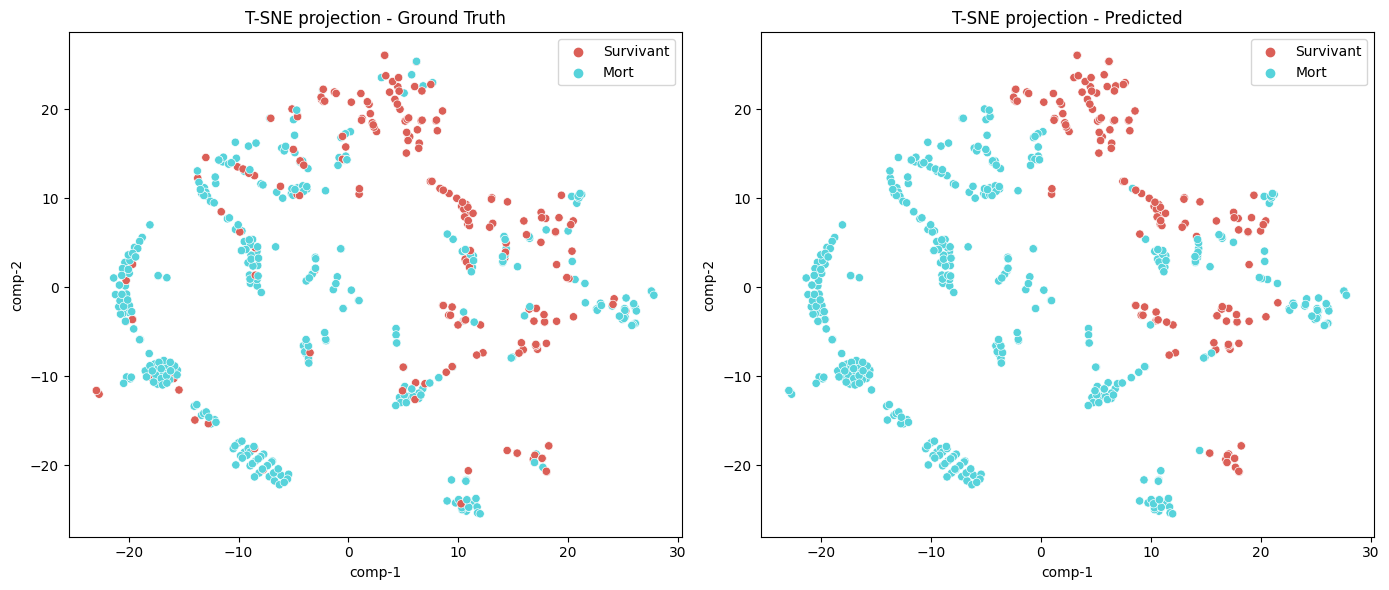

In [62]:
# TSNE projection - Ground Truth vs Predicted

plt.figure(figsize=(14, 6))

# Aficher Ground Truth
plt.subplot(1, 2, 1)

tsne = TSNE(n_components=2, verbose=0, random_state=42)
z = tsne.fit_transform(best_fold_XTrain)

df = pd.DataFrame()
df['y'] = best_fold_YRTrain
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

leg = ['Mort' if value == 1 else 'Survivant' for value in df.y.tolist()]

sns.scatterplot(x="comp-1", y="comp-2", hue=leg,
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection - Ground Truth")

# Afficher Predicted
plt.subplot(1, 2, 2)

tsne = TSNE(n_components=2, verbose=0, random_state=42)
z = tsne.fit_transform(best_fold_XTrain)

df = pd.DataFrame()
df['y'] = best_fold_YhatTrainKNN
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

leg = ['Mort' if value == 1 else 'Survivant' for value in df.y.tolist()]

sns.scatterplot(x="comp-1", y="comp-2", hue=leg,
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection - Predicted")

plt.tight_layout()
plt.show()

Le graphique de gauche nous montre la représentation graphique des points de notre base de données avec les vraies valeurs des classes tandis que sur notre graphique à droite, nous obtenons la projection de nos points prédits avec le classifieur KNN en deux dimensions. Cela nous permet de comparer visuellement les points qui ont été correctement prédits et ce qui ne l'ont pas été.

## Classifieur de Bayes Naïf CNB


Le modèle  du classifieur de Bayes Naïf est couramment choisi pour sa rapidité de mise en œuvre et sa capacité à traiter des dimensions élevées, faisant de lui un choix judicieux pour des bases de données comportant de nombreuses fonctionnalités.

Le fonctionnement théorique du classifieur de Bayes naïf repose sur le théorème de Bayes, qui permet d'estimer la probabilité qu'une instance de données appartienne à une classe spécifique. Le modèle assume l'indépendance des caractéristiques, ce qui signifie qu'il considère chaque caractéristique comme étant indépendante des autres. Cette hypothèse simplificatrice, bien que parfois peu réaliste, permet au classifieur de Bayes naïf de fournir des résultats robustes dans de nombreux scénarios.

En pratique, le classifieur évalue la probabilité a priori de chaque classe ainsi que la probabilité conditionnelle de chaque caractéristique étant donné la classe. En combinant ces informations, il calcule la probabilité a posteriori de chaque classe pour une instance de données donnée. La classe avec la probabilité la plus élevée est attribuée à l'instance, permettant ainsi la classification des données de manière rapide et efficace.

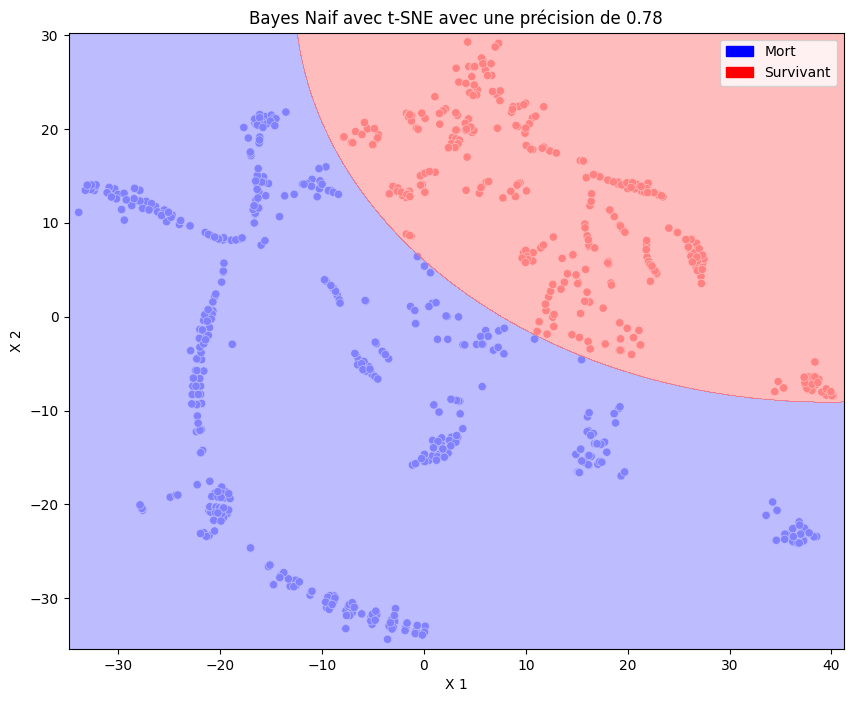

In [63]:
from sklearn.naive_bayes import GaussianNB


model_bayes = GaussianNB()
model_bayes.fit(X_train, y_train)

# Prédire les données de test
predictions_bayes = model_bayes.predict(X_test)
accuracy_bayes = accuracy_score(y_test, predictions_bayes)
conf_matrix_bayes = confusion_matrix(y_test, predictions_bayes)

# Apliquer le TSNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)


model_bayes.fit(X_tsne, y)
predictions_bayes_tsne = model_bayes.predict(X_tsne)
accuracy_bayes_tsne = accuracy_score(y, predictions_bayes_tsne)
conf_matrix_bayes_tsne = confusion_matrix(y, predictions_bayes_tsne)

# Afficher les points
plt.figure(figsize=(10, 8))


sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=predictions_bayes_tsne, palette='bwr', marker='o', legend=False)

# Afficher les frontières de décision
h = .02
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_bayes.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)

# Ajouter une légende
label2 = ['Mort' if label == 0 else 'Survivant' for label in y]
unique_labels = list(set(label2))
legend_labels = ['Mort' if label == unique_labels[0] else 'Survivant' for label in label2]


colors = {'Mort': 'blue', 'Survivant': 'red'}
legend_patches = [mpatches.Patch(color=colors[label], label=label) for label in set(legend_labels)]

legend = Legend(plt.gca(), legend_patches, labels=set(legend_labels), loc='upper right')
plt.gca().add_artist(legend)

plt.title(f'Bayes Naif avec t-SNE avec une précision de {accuracy_bayes_tsne:.2f}')
plt.xlabel('X 1')
plt.ylabel('X 2')
plt.show()

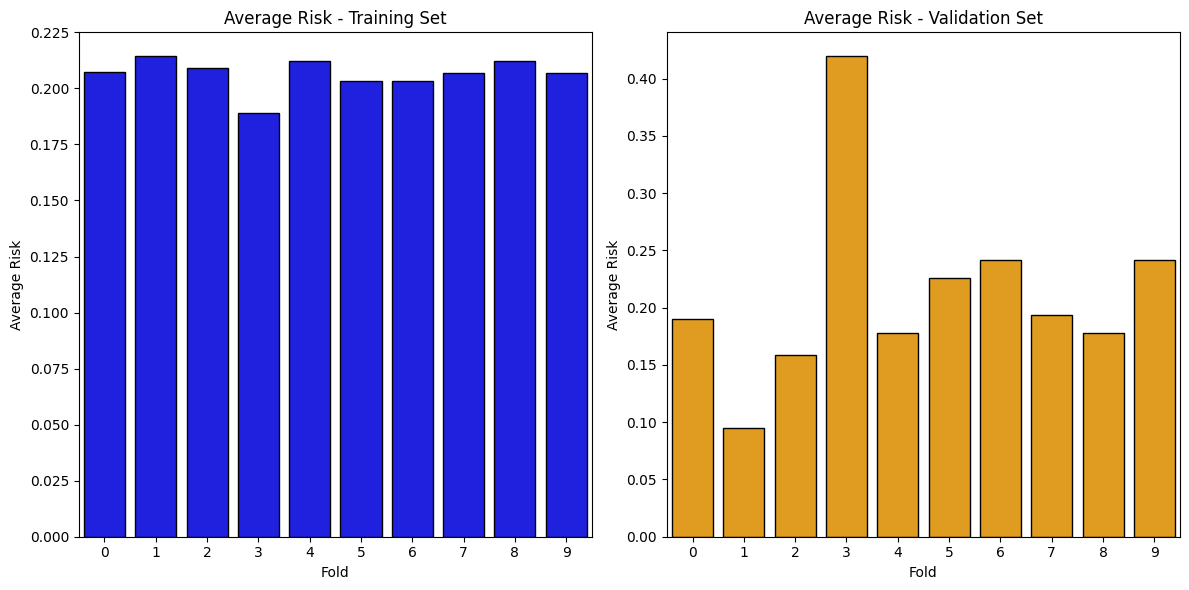

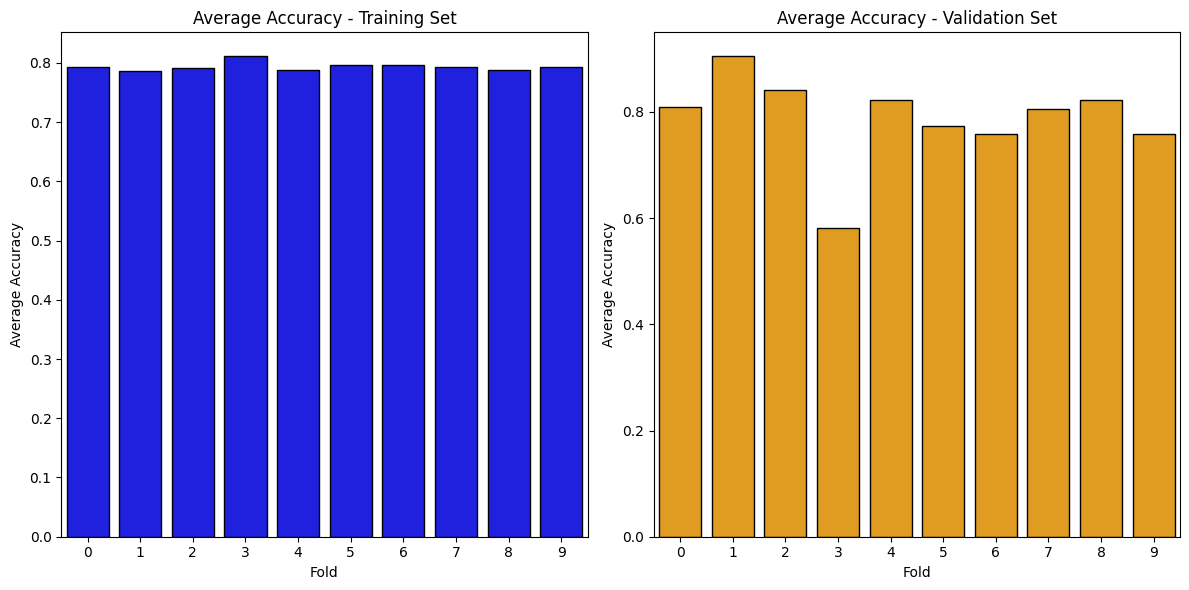

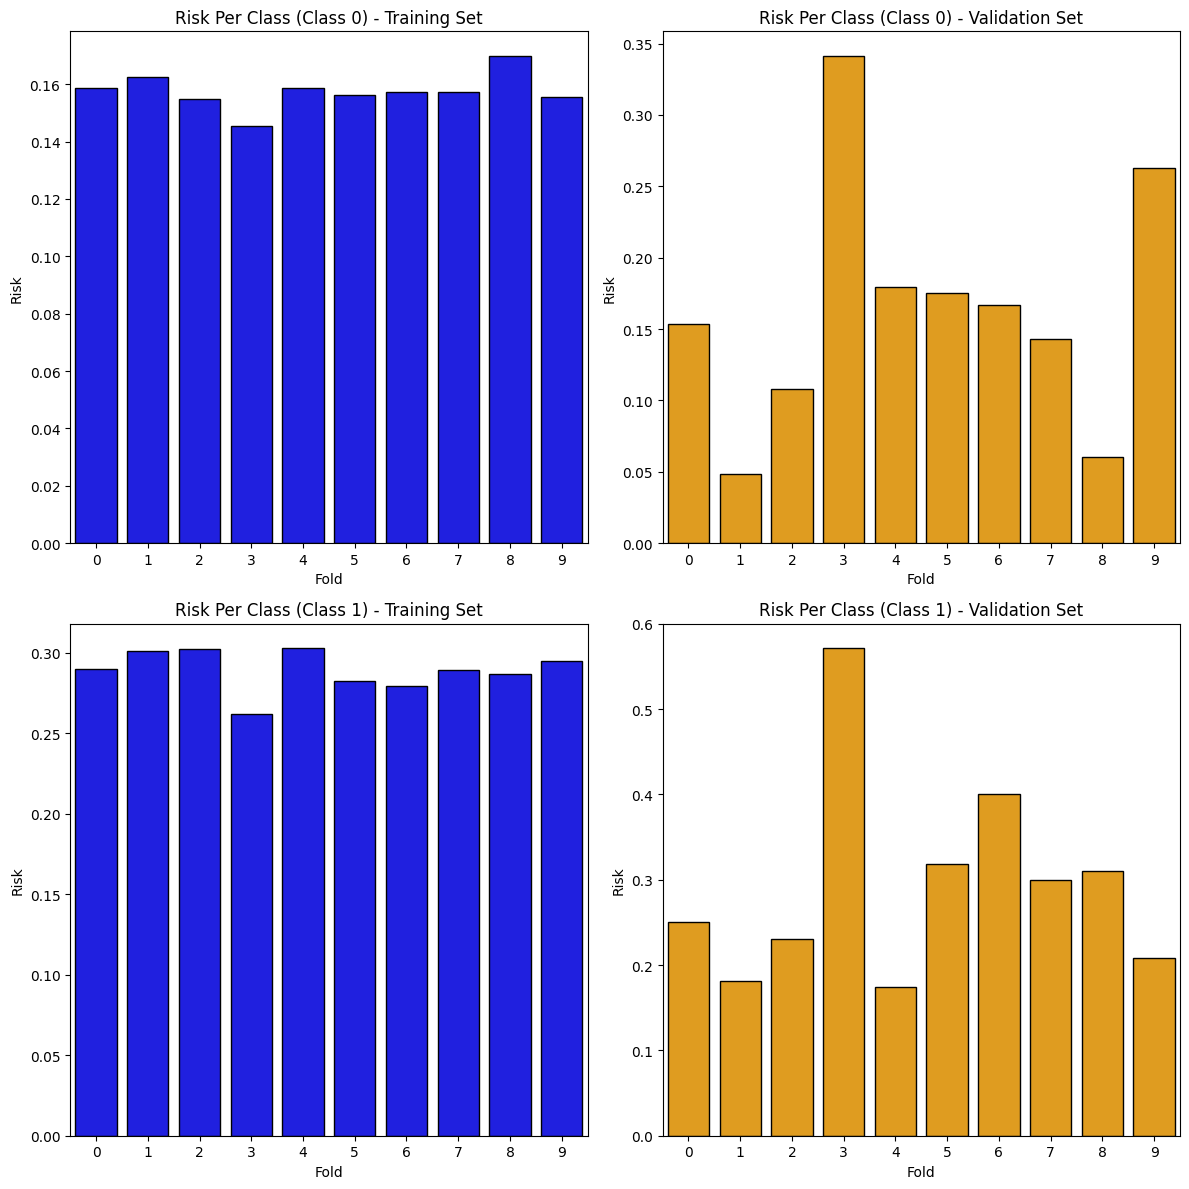

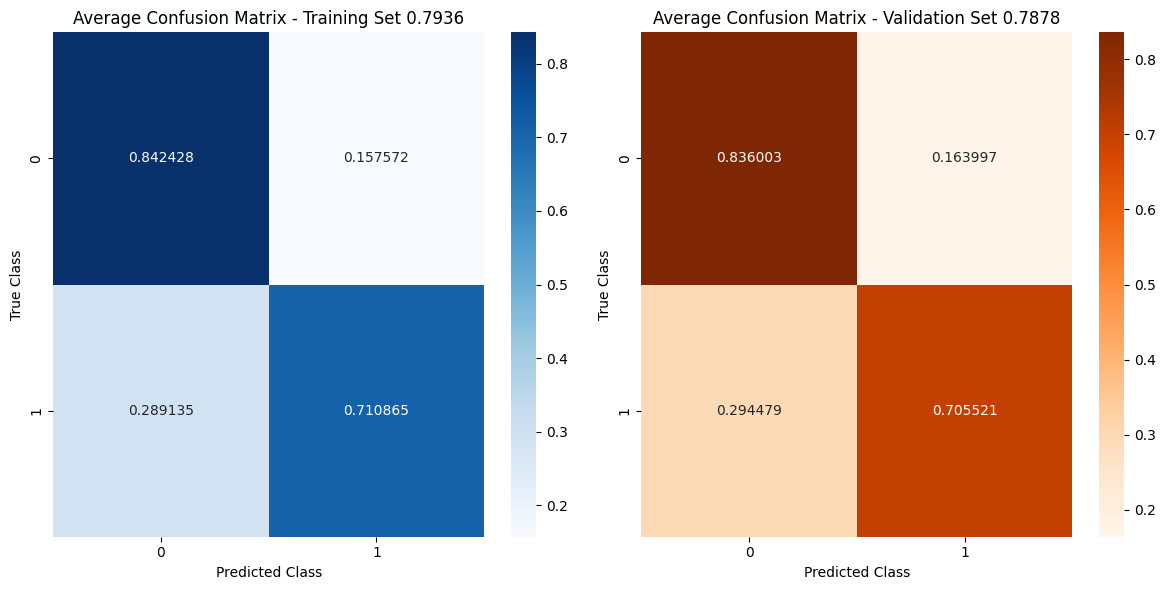

In [64]:
#Validation Croisée
nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

stock_average_risk_Train_bayes = np.zeros((nbFolds, 1))
stock_average_risk_Val_bayes = np.zeros((nbFolds, 1))

stock_RiskPerClass_Train_bayes = np.zeros((nbFolds, K))
stock_RiskPerClass_Val_bayes = np.zeros((nbFolds, K))

stock_Accuracy_Train_bayes = np.zeros(nbFolds)
stock_Accuracy_Val_bayes = np.zeros(nbFolds)

stock_AccPerClass_Train_bayes = np.zeros((nbFolds, K))
stock_AccPerClass_Val_bayes = np.zeros((nbFolds, K))

stock_ConfMat_Train_bayes = np.zeros((nbFolds, K, K))
stock_ConfMat_Val_bayes = np.zeros((nbFolds, K, K))

best_fold_XTrain = None
best_fold_YRTrain = None
best_fold_YhatTrainCBN = None
max_accuracy = 0.0

f = 0

for train, val in kfSplit:
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    model_CBN = GaussianNB()
    model_CBN.fit(XTrain, YRTrain.ravel())

    # Prediction on the training samples
    YhatTrainCBN = model_CBN.predict(XTrain)
    stock_average_risk_Train_bayes[f, 0] = compute_average_risk(YRTrain, YhatTrainCBN, K, L)
    stock_RiskPerClass_Train_bayes[f, :] = compute_risk_per_class(YRTrain, YhatTrainCBN, K, L)
    stock_Accuracy_Train_bayes[f] = compute_accuracy(YRTrain, YhatTrainCBN)
    stock_AccPerClass_Train_bayes[f, :] = compute_accuracy_per_class(YRTrain, YhatTrainCBN, K)
    stock_ConfMat_Train_bayes[f, :, :] = compute_confusion_matrix(YRTrain, YhatTrainCBN, K)

    # Prediction on the testing samples
    YhatValCBN = model_CBN.predict(XVal)
    stock_average_risk_Val_bayes[f, 0] = compute_average_risk(YRVal, YhatValCBN, K, L)
    stock_RiskPerClass_Val_bayes[f, :] = compute_risk_per_class(YRVal, YhatValCBN, K, L)
    stock_Accuracy_Val_bayes[f] = compute_accuracy(YRVal, YhatValCBN)
    stock_AccPerClass_Val_bayes[f, :] = compute_accuracy_per_class(YRVal, YhatValCBN, K)
    stock_ConfMat_Val_bayes[f, :, :] = compute_confusion_matrix(YRVal, YhatValCBN, K)

    accuracy_val = compute_accuracy(YRTrain, YhatTrainCBN)
    if accuracy_val > max_accuracy:
        max_accuracy = accuracy_val
        best_fold_XTrain = XTrain
        best_fold_YRTrain = YRTrain
        best_fold_YhatTrainCBN = YhatTrainCBN

    f = f + 1

# Afficher le risque moyen
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Train_bayes.ravel(), color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Val_bayes.ravel(), color='orange',ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.tight_layout()
plt.show()

# Afficher l'accuarcy moyenne
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Train_bayes, color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')


plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Val_bayes, color='orange',ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

# Aficher risk per class
plt.figure(figsize=(12, 12))

# Subplot  Classe 0 - Training Set
plt.subplot(2, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Train_bayes[:, 0], color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 0) - Training Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

# Subplot Classe 1 - Training Set
plt.subplot(2, 2, 3)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Train_bayes[:, 1], color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 1) - Training Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

# Subplot Classe 0 - Validation Set
plt.subplot(2, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Val_bayes[:, 0], color='orange', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 0) - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

# Subplot Classe 1 - Validation Set
plt.subplot(2, 2, 4)
sns.barplot(x=np.arange(nbFolds), y=stock_RiskPerClass_Val_bayes[:, 1], color='orange', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Risk Per Class (Class 1) - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Risk')

plt.tight_layout()
plt.show()



# Afficher la matrice de confusion moyenne
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(np.mean(stock_ConfMat_Train_bayes, 0), annot=True, cmap='Blues', fmt='g')
plt.title(f'Average Confusion Matrix - Training Set {np.mean(stock_Accuracy_Train_bayes):.4f}')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.subplot(1, 2, 2)
sns.heatmap(np.mean(stock_ConfMat_Val_bayes, 0), annot=True, cmap='Oranges', fmt='g')
plt.title(f'Average Confusion Matrix - Validation Set {np.mean(stock_Accuracy_Val_bayes):.4f}')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.tight_layout()
plt.show()

Les deux premières figures indiquent le risque moyen sur l'ensemble d'entraînement (Figure 1) et l'ensemble de validation (Figure 2) pour chaque fold.

La faible variabilité sur la première figure suggère que le modèle est stable sur différents sous-ensembles de données. En effet, le risque moyen reste stable pour la base d'apprentissage se situant autour des 20% environ.

En ce qui concerne la deuxième figure(base de test), le risque moyen diminue d'un fold à l'autre mais augemente parfois. Si l'erreur moyen ne faisait que diminuer, cela suggèrerait une amélioration des performances. Ici, le risque diminue parfois et augmente d'autres fois. Le risque d'erreur moyen le plus élevé sur la base de test est 28% environ contre à peine 15% pour le risque moyen le plus faible.
   


Les figures 3 et 4 montrent la précision moyenne sur l'ensemble d'entraînement (Figure 3) et l'ensemble de validation (Figure 4) pour chaque fold.

L'accuracy au niveau de la base d'entraînement et très stable, autour des 80%. En ce qui concerne la base d'apprentissage, elle varie d'avantage mais cela reste tres convenable. En effet, l'accuracy pour l'ensemble de valisation fluctue entre 70% et 85% environ.


En ce qui concerne les deux figres suivantes (Figures 5 et 6), elles montrent les risques pour la classe 0, soit les personnes "mortes". Sur la base d'entraînement, le risque varie légèrement autour de 15%, ce qui peut être lègèrement élevé mais tout de même  relativement convenable. Néanmoins, sur la base de test le risque pour la classe  fluctue d'avantage entre 5% et plus de 20%.

Ensuite viennent les figures 7 et 8 qui concernent les risques pour la classe 1, soit la classe des personnes "survivantes". Le risque pour cette classe est bien plus élevé que pour la classe 0. En effet, il est possible que le modèle ait du mal à identifier correctement les personnes survivantes, ce qui conduit à des prédictions erronées, comme nous l'avons déjà mentionné auparavant.Pour la base d'apprentissage, le risque pour la classe 1 est stable et proche de 30%. En ce qui concerne le risque pour la classe 1 au niveau de la base de test , il fluctue bien plus entre 20% et 50%.


Finalement, les deux dernières figures présentent la matrice de confusion moyenne sur l'ensemble d'entraînement (Figure 9) et l'ensemble de validation (Figure 10).
Pour la figure 9, La matrice de confusion pour l'ensemble d'entraînement, affichant les résultats d'un modèle de classification binaire, est représentée par ces valeurs:\begin{bmatrix} 0.84 & 0.16 \\ 0.29 & 0.71 \end{bmatrix}\ Ces chiffres décrivent la performance du modèle de Bayes de la manière suivante : 84% des échantillons de la classe positive ont été correctement identifiés (True Positives), et 71% des échantillons de la classe négative ont également été correctement identifiés (True Negatives). La classe positive est la classe des "survivants", tandis que la classe négative est "celle des morts". Cependant, le modèle a présenté quelques faiblesses, en classant incorrectement 16% des échantillons positifs comme négatifs (False Negatives) et 29% des échantillons négatifs comme positifs (False Positives). Autrement dit 16% des personnes survivantes ont été classées comme "mortes" d'après le modèle et 29% des personnes "mortes" ont été classées "survivantes".

La matrice de confusion pour l'ensemble de validation, affichant les résultats d'un modèle de classification binaire, est identique à celle de l'ensemble d'entraînement, soit  \begin{bmatrix} 0.84 & 0.16 \\ 0.29 & 0.71 \end{bmatrix} \.
Ces valeurs représentent la performance du modèle sur l'ensemble de validation, indiquant que le modèle a bien généralisé ses capacités de classification sur des données non vues. Les chiffres reflètent des performances similaires à celles de l'ensemble d'entraînement, avec 84% de précision pour la classe positive et 71% pour la classe négative. Les erreurs de classification, représentées par les valeurs 0.16 et 0.29, révèlent également des résultats cohérents avec ceux de l'ensemble d'entraînement.

Le modèle semble donc maintenir des performances équilibrées sur des données inconnues.

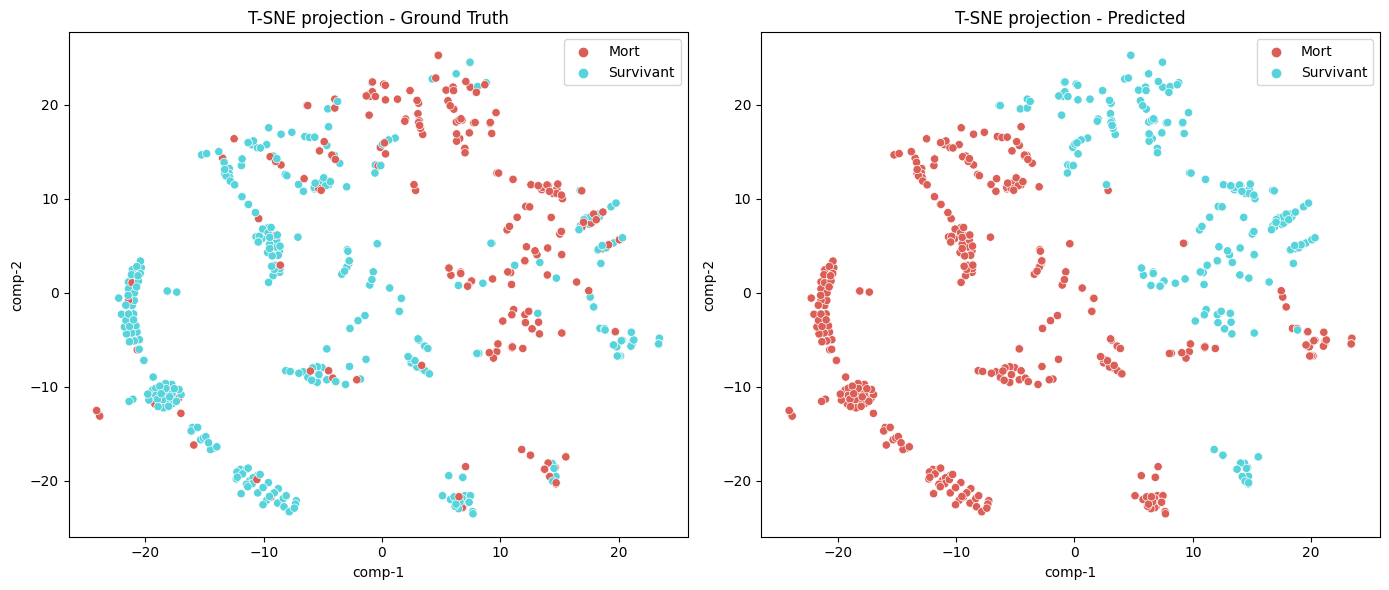

In [65]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

# Créer une palette HLS personnalisée
palette_hls_custom = sns.color_palette("hls", 2)

plt.figure(figsize=(14, 6))

# Afficher Ground Truth
plt.subplot(1, 2, 1)

tsne = TSNE(n_components=2, verbose=0, random_state=42)
z = tsne.fit_transform(best_fold_XTrain)

df = pd.DataFrame()
df['y'] = best_fold_YRTrain
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

# Inverser les couleurs pour le Ground Truth
leg_ground_truth = ['Survivant' if value == 1 else 'Mort' for value in df.y.tolist()]

sns.scatterplot(x="comp-1", y="comp-2", hue=leg_ground_truth,
                palette=palette_hls_custom,
                data=df).set(title="T-SNE projection - Ground Truth")

# Afficher Predicted
plt.subplot(1, 2, 2)

tsne = TSNE(n_components=2, verbose=0, random_state=42)
z = tsne.fit_transform(best_fold_XTrain)

df = pd.DataFrame()
df['y'] = best_fold_YhatTrainCBN
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

leg_predicted = ['Mort' if value == 1 else 'Survivant' for value in df.y.tolist()]

sns.scatterplot(x="comp-1", y="comp-2", hue=leg_predicted,
                palette=palette_hls_custom,
                data=df).set(title="T-SNE projection - Predicted")

plt.tight_layout()
plt.show()


## Classifieur Regression Logistique



Nous appliquons actuellement une régression logistique .
La régression logistique est une méthode statistique utilisée pour modéliser la relation entre une variable binaire (deux catégories, par exemple 0 ou 1) appelée variable dépendante et un ensemble de variables indépendantes.Concrètement, la régression logistique nous permet de créer un modèle prédictif capable de classer les passagers en deux catégories distinctes : ceux qui ont survécu et ceux qui n'ont pas survécu au naufrage du Titanic.
Contrairement à la régression linéaire, la régression logistique utilise une fonction logistique pour estimer la probabilité que la variable dépendante soit égale à 1 en fonction des valeurs des variables indépendantes.
 Cette technique est particulièrement adaptée aux problèmes de classification binaire comme le nôtre.

Tout d'abord, le modèle de régression logistique va être instancié avec des paramètres tels que `max_iter=1000` pour spécifier le nombre maximal d'itérations, et `random_state=42` pour assurer la reproductibilité des résultats.
Le modèle est ensuite entraîné sur les données d'entraînement (`X_train`, `y_train`) et évalué sur les données de test.

Ensuite, nous appliquerons une technique de réduction de dimensionnalité : l'embedding stochastique voisin en t-distribution (TSNE).

TSNE est une méthode de réduction de dimensionnalité non linéaire utilisée principalement pour visualiser des données complexes à haute dimension. Elle mesure les similarités entre les paires de points dans l'espace d'origine, puis cherche à les représenter dans un espace de dimension réduite de manière à préserver ces similarités. C'est particulièrement efficace pour conserver les structures de clusters dans les données.

 Finalement, un graphique de dispersion est généré pour visualiser la répartition des points dans l'espace réduit à l'aide du TSNE.

Accuracy du modèle Regression Logistique t-SNE: 0.77


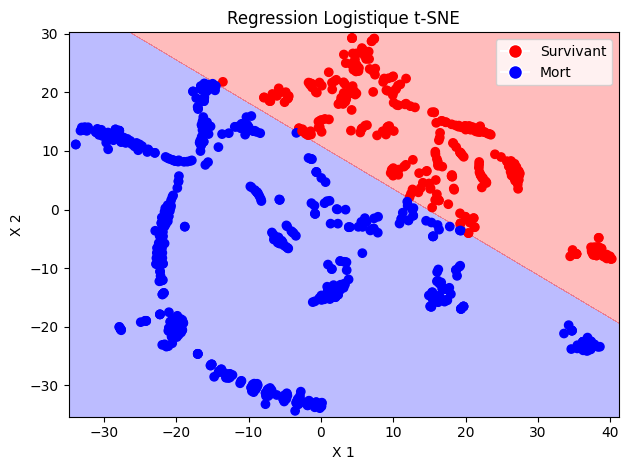

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, confusion_matrix

# Charger vos données X et y ici
# Assurez-vous que X et y sont correctement définis avant d'exécuter le code

# Créer le modèle de régression logistique
logistique_model = LogisticRegression(max_iter=1000, random_state=42)

# Entraîner le modèle sur les données originales
logistique_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions_rl = logistique_model.predict(X_test)

# Calculer l'accuracy et la matrice de confusion sur l'ensemble de test
accuracy_logistic = accuracy_score(y_test, predictions_rl)
conf_matrix_rl = confusion_matrix(y_test, predictions_rl)


# Appliquer t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Entraîner le modèle de régression logistique sur les données t-SNE
logistique_model.fit(X_tsne, y)

# Faire des prédictions sur les données t-SNE
predictions_rl_tsne = logistique_model.predict(X_tsne)
accuracy_logistic_tsne = accuracy_score(y, predictions_rl_tsne)
conf_matrix_rl_tsne = confusion_matrix(y, predictions_rl_tsne)

print(f'Accuracy du modèle Regression Logistique t-SNE: {accuracy_logistic_tsne:.2f}')

# Afficher les graphiques avec couleurs de fond, frontières de décision et légendes personnalisées
# Fonction pour tracer la frontière de décision
def plot_decision_boundary(model, X, y, ax, title):
    h = .02  # pas de la grille
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Ajouter des couleurs de fond
    ax.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)

# Fonction pour tracer les points de données avec légendes personnalisées
def plot_scatter(ax, X, predictions, title):
    scatter = ax.scatter(X[:, 0], X[:, 1], c=predictions, cmap='bwr', marker='o', label='Prédictions')

    # Créer une légende personnalisée
    classes = ["Mort", "Survivant"]
    legend_labels = {i: label for i, label in enumerate(classes)}
    scatter_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=legend_labels[1])
    contour_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=legend_labels[0])
    plt.legend(handles=[scatter_legend, contour_legend])

    ax.set_title(title)
    ax.set_xlabel('X 1')
    ax.set_ylabel('X 2')

# Afficher le graphique t-SNE avec la régression logistique
# Créer une figure avec un seul subplot
fig, ax = plt.subplots()

# Afficher avec couleurs de fond, frontières de décision et légendes personnalisées
plot_decision_boundary(logistique_model, X_tsne, y, ax, 'Regression Logistique t-SNE')
plot_scatter(ax, X_tsne, predictions_rl_tsne, 'Regression Logistique t-SNE')

plt.tight_layout()
plt.show()



Nous mettons ensuite en œuvre une validation croisée à 10 folds avec une régression logistique dans le cadre de l'apprentissage sur notre base de données Titanic. La validation croisée est une technique permettant d'évaluer la performance du modèle de manière plus robuste en le testant sur plusieurs sous-ensembles de données.
Les mesures telles que le risque moyen, le risque par classe, l'exactitude moyenne et la matrice de confusion sont calculées et stockées à chaque fois.

Les graphiques générés présentent les résultats de la validation croisée. Le premier graphique montre le risque moyen sur les ensembles d'entraînement et de validation. Le deuxième graphique présente l'exactitude moyenne sur les deux ensembles. Enfin, la matrice de confusion moyenne est affichée pour les ensembles d'entraînement et de validation.

Ces visualisations offrent un aperçu de la performance du modèle sur différents plis, permettant ainsi d'évaluer sa robustesse et sa capacité à généraliser sur des données non vues.

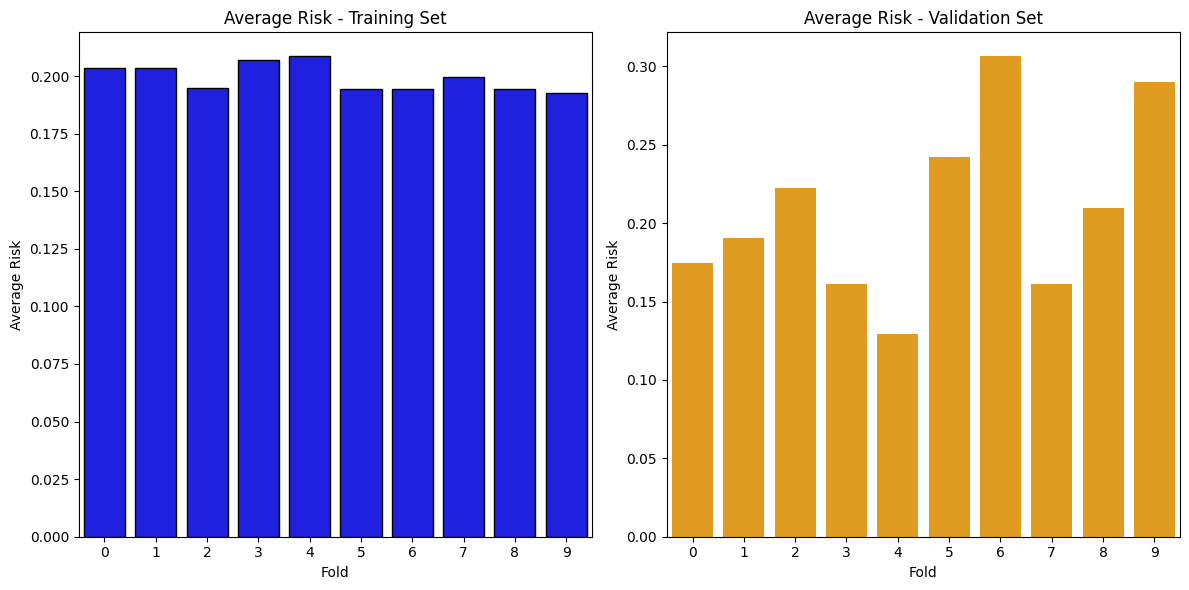

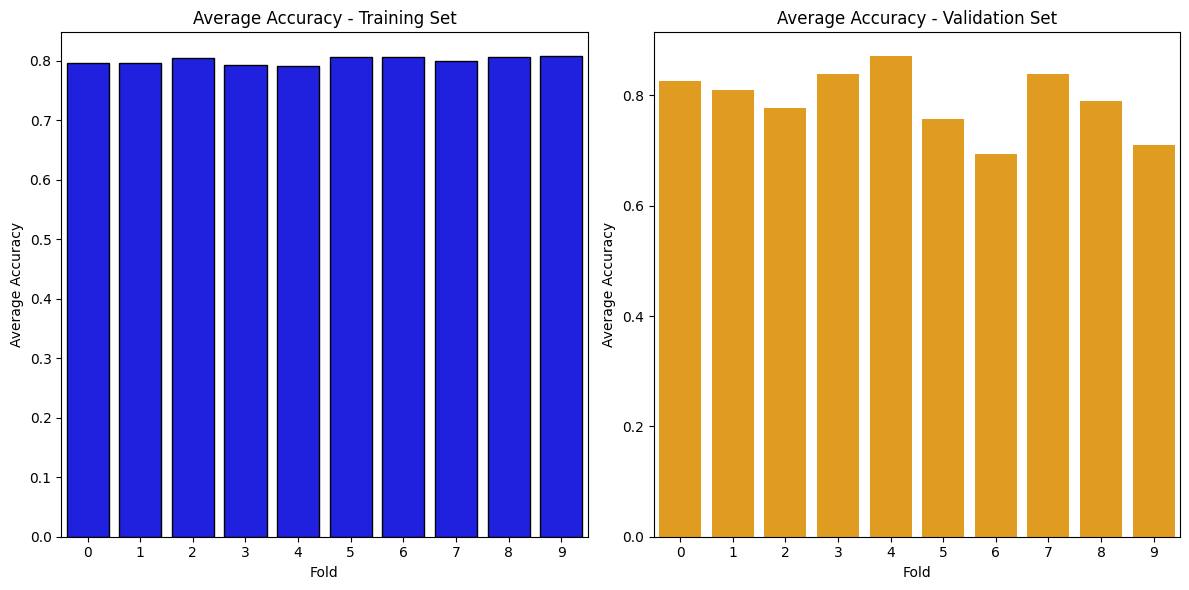

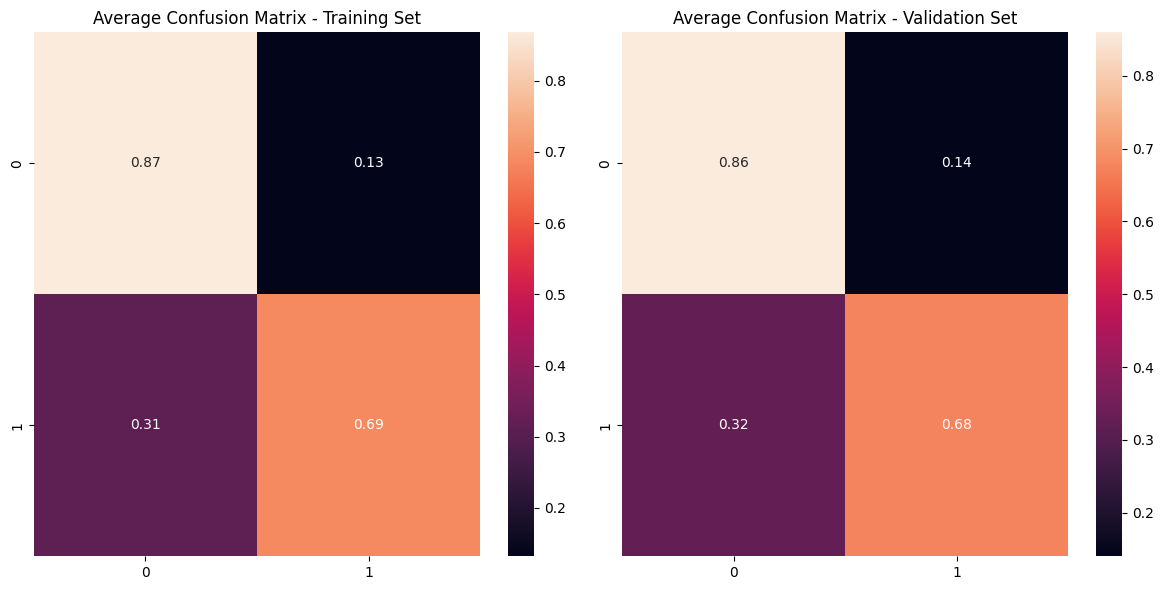

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(407)

K = 2  # Assurez-vous de définir correctement le nombre de classes

nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

stock_average_risk_Train_rl = np.zeros((nbFolds, 1))
stock_average_risk_Val_rl = np.zeros((nbFolds, 1))

stock_RiskPerClass_Train_rl = np.zeros((nbFolds, K))
stock_RiskPerClass_Val_rl = np.zeros((nbFolds, K))

stock_Accuracy_Train_rl = np.zeros(nbFolds)
stock_Accuracy_Val_rl = np.zeros(nbFolds)

stock_AccPerClass_Train_rl = np.zeros((nbFolds, K))
stock_AccPerClass_Val_rl = np.zeros((nbFolds, K))

stock_ConfMat_Train_rl = np.zeros((nbFolds, K, K))
stock_ConfMat_Val_rl = np.zeros((nbFolds, K, K))

f = 0

for train, val in kfSplit:
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    logistique_model = LogisticRegression(max_iter=1000, random_state=42)
    logistique_model.fit(XTrain, YRTrain)

    # Prediction sur les échantillons d'entraînement
    YhatTrain_lr = logistique_model.predict(XTrain)
    stock_average_risk_Train_rl[f, 0] = 1 - accuracy_score(YRTrain, YhatTrain_lr)
    stock_RiskPerClass_Train_rl[f, :] = 1 - accuracy_score(YRTrain, YhatTrain_lr, normalize=False) / np.sum(YRTrain == YRTrain)
    stock_Accuracy_Train_rl[f] = accuracy_score(YRTrain, YhatTrain_lr)
    stock_AccPerClass_Train_rl[f, :] = accuracy_score(YRTrain, YhatTrain_lr, normalize=False) / np.sum(YRTrain == YRTrain)
    stock_ConfMat_Train_rl[f, :, :] = confusion_matrix(YRTrain, YhatTrain_lr)

    # Prediction sur les échantillons de test
    YhatVal_lr = logistique_model.predict(XVal)
    stock_average_risk_Val_rl[f, 0] = 1 - accuracy_score(YRVal, YhatVal_lr)
    stock_RiskPerClass_Val_rl[f, :] = 1 - accuracy_score(YRVal, YhatVal_lr, normalize=False) / np.sum(YRVal == YRVal)
    stock_Accuracy_Val_rl[f] = accuracy_score(YRVal, YhatVal_lr)
    stock_AccPerClass_Val_rl[f, :] = accuracy_score(YRVal, YhatVal_lr, normalize=False) / np.sum(YRVal == YRVal)
    stock_ConfMat_Val_rl[f, :, :] = confusion_matrix(YRVal, YhatVal_lr)

    f = f + 1

# Plot average risk
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Train_rl.ravel(), color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Val_rl.ravel(), color='orange')
plt.title('Average Risk - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.tight_layout()
plt.show()

# Plot average accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Train_rl, color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Val_rl, color='orange')
plt.title('Average Accuracy - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

# Heatmap average confusion matrix
labels = ['Class ' + str(i + 1) for i in range(K)]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
conf_mat_train_avg = np.mean(stock_ConfMat_Train_rl, axis=0)
conf_mat_train_avg_percent = conf_mat_train_avg / conf_mat_train_avg.sum(axis=1, keepdims=True)
sns.heatmap(conf_mat_train_avg_percent, annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Training Set')

plt.subplot(1, 2, 2)
conf_mat_val_avg = np.mean(stock_ConfMat_Val_rl, axis=0)
conf_mat_val_avg_percent = conf_mat_val_avg / conf_mat_val_avg.sum(axis=1, keepdims=True)
sns.heatmap(conf_mat_val_avg_percent, annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Validation Set')

plt.tight_layout()
plt.show()



Les deux premières figures indiquent le risque moyen sur l'ensemble d'entraînement (Figure 1) et l'ensemble de validation (Figure 2) pour chaque fold.

La faible variabilité sur la première figure suggère que le modèle est stable sur différents sous-ensembles de données. En effet, le risque moyen reste stable pour la base d'apprentissage se situant autour des 20% environ.

En ce qui concerne la deuxième figure(base de test), le risque moyen diminue d'un fold à l'autre mais augemente parfois. Si l'erreur moyen ne faisait que diminuer, cela suggèrerait une amélioration des performances. Ici, le risque diminue parfois et augmente d'autres fois. Le risque d'erreur moyen le plus élevé sur la base de test est 30% environ contre un peu moins de 15% pour le risque moyen le plus faible.
   


Les figures 3 et 4 montrent la précision moyenne sur l'ensemble d'entraînement (Figure 3) et l'ensemble de validation (Figure 4) pour chaque fold.

L'accuracy au niveau de la base d'entraînement et très stable, autour des 80%. En ce qui concerne la base d'apprentissage, elle varie légèrement mais cela reste tres convenable. En effet, l'accuracy pour l'ensemble de valisation se situe également autour de 80%.


Finalement, les deux dernières figures présentent la matrice de confusion moyenne sur l'ensemble d'entraînement (Figure 5) et l'ensemble de validation (Figure 6).
Pour la figure 5, La matrice de confusion pour l'ensemble d'entraînement, affichant les résultats d'un modèle de classification binaire, est représentée par ces valeurs:\begin{bmatrix} 0.87 & 0.13 \\ 0.31 & 0.69 \end{bmatrix} Ces chiffres décrivent la performance du modèle de Bayes de la manière suivante : 86% des échantillons de la classe positive ont été correctement identifiés (True Positives), et 69% des échantillons de la classe négative ont également été correctement identifiés (True Negatives). La classe positive est la classe des "survivants", tandis que la classe négative est "celle des morts". Cependant, le modèle a présenté quelques faiblesses, en classant incorrectement 13% des échantillons positifs comme négatifs (False Negatives) et 31% des échantillons négatifs comme positifs (False Positives). Autrement dit 13% des personnes survivantes ont été classées comme "mortes" d'après le modèle et 31% des personnes "mortes" ont été classées "survivantes".

La matrice de confusion pour l'ensemble de validation, affichant les résultats d'un modèle de classification binaire, est identique à celle de l'ensemble d'entraînement, soit  \begin{bmatrix} 0.86 & 0.14 \\ 0.32 & 0.68 \end{bmatrix} \.
Ces valeurs représentent la performance du modèle sur l'ensemble de validation, indiquant que le modèle a bien généralisé ses capacités de classification sur des données non vues. Les chiffres reflètent des performances similaires à celles de l'ensemble d'entraînement, avec 86% de précision pour la classe positive et 68% pour la classe négative. Les erreurs de classification, représentées par les valeurs 0.14 et 0.32, révèlent également des résultats cohérents avec ceux de l'ensemble d'entraînement.

Le modèle semble donc maintenir des performances équilibrées sur des données inconnues.

## Classifieur Arbre de décision


Les classifieurs d'arbres de décision sont des outils puissants et polyvalents utilisés dans le domaine de l'apprentissage automatique pour la classification et la prédiction.

Dans le cadre de notre projet, nous souhaitons appliquer ces classifieurs à notre base de données spécifique. Le critère de Gini, qui mesure la pureté des nœuds, sera crucial pour évaluer la qualité des décisions prises à chaque étape de la construction de l'arbre. Nous visons à minimiser le critère de Gini pour obtenir des nœuds plus purs, facilitant ainsi une classification précise.
Un autre paramètre essentiel est l'alpha, ou coefficient d'élagage, qui joue un rôle majeur dans la régulation de la complexité de l'arbre. En ajustant l'alpha, nous cherchons à équilibrer la capacité de notre arbre à s'adapter aux données d'entraînement sans tomber dans le piège du surajustement. Cette étape est cruciale pour garantir que notre modèle puisse généraliser efficacement à de nouvelles données.

Lors de l'entraînement du classifieur d'arbres de décision sur notre base de données, nous explorons différentes valeurs de critère de Gini et d'alpha. Notre objectif est de trouver la combinaison optimale de ces paramètres, celle qui maximise les performances de notre modèle tout en préservant sa capacité à généraliser. Ce processus itératif nous permettra de tirer le meilleur parti de notre classifieur d'arbres de décision pour notre cas d'utilisation spécifique.

### Arbre de décision avec critère d'arrêt: alpha

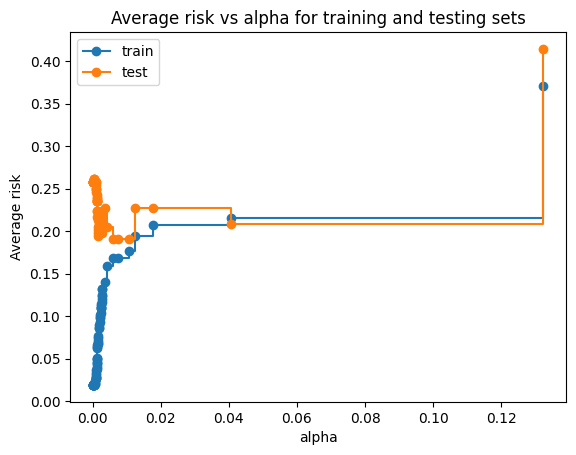

Nb feuilles DT_elague = 7


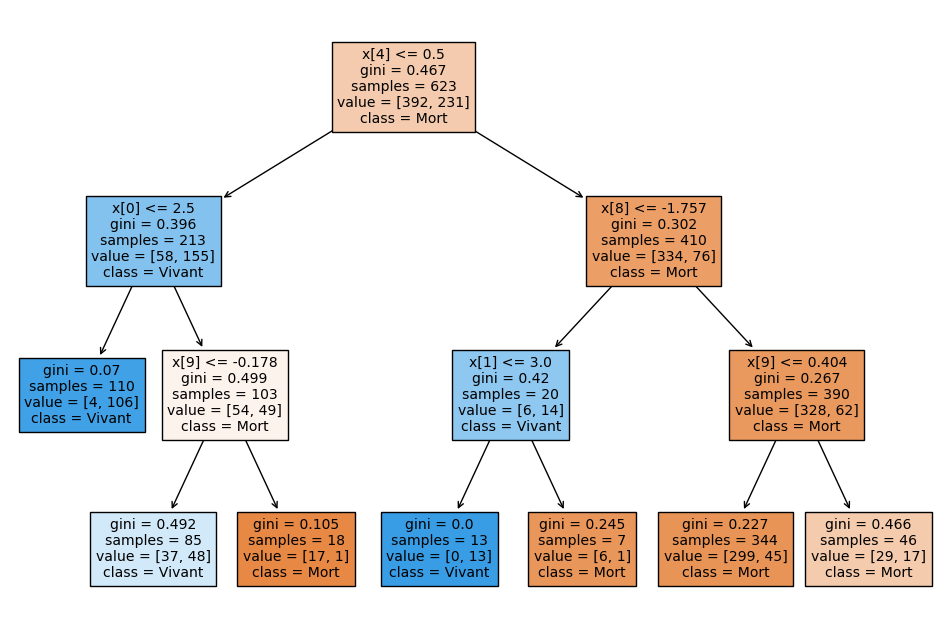

Accuracy du modèle arbre de décision élagué avec t-SNE: 0.84


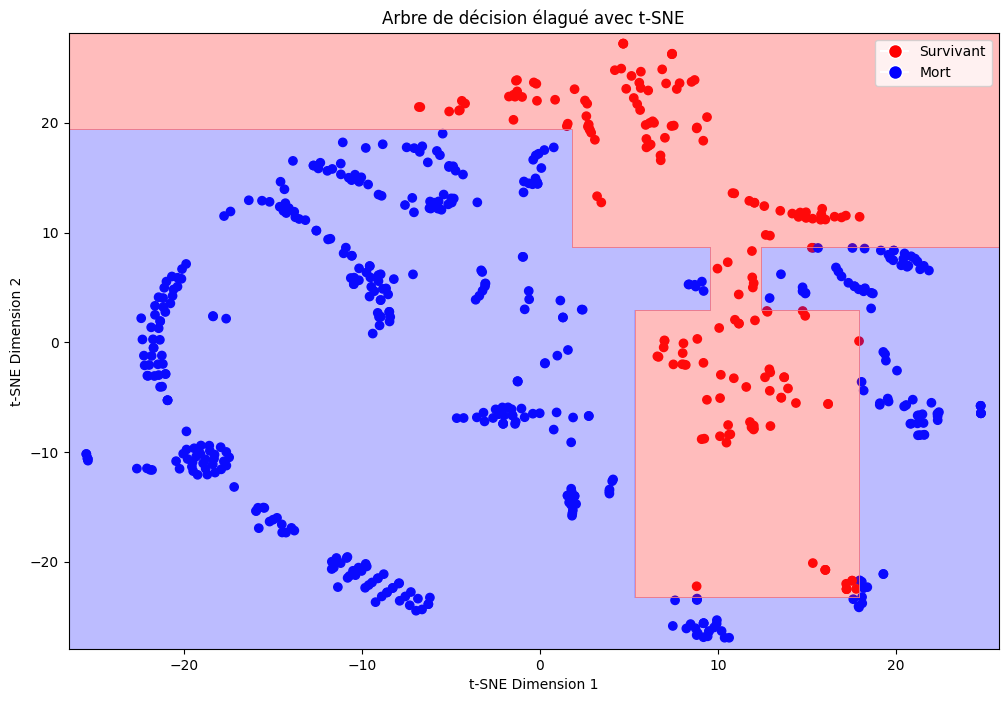

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE


y_train = y_train.ravel() - 1

# Fit Decision Tree avec élagage
DT = DecisionTreeClassifier(random_state=0)
path = DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Compute risks versus Alpha
stocks_DT = []
stock_risk_train = []
stock_risk_test = []

for ccp_alpha in ccp_alphas:
    DT_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    DT_alpha.fit(X_train, y_train)
    stocks_DT.append(DT_alpha)
    # Risk Train DT :
    YhatTrain = DT_alpha.predict(X_train)
    stock_risk_train.append(1 - np.sum(y_train == YhatTrain) / len(y_train))
    # Risk Test DT :
    YhatTest = DT_alpha.predict(X_test)
    stock_risk_test.append(1 - np.sum(y_test == YhatTest) / len(y_test))

# Plot figure Risk versus Alpha
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Average risk")
ax.set_title("Average risk vs alpha for training and testing sets")
ax.plot(ccp_alphas, stock_risk_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, stock_risk_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Entraîner le modèle d'arbre de décision avec le meilleur alpha
best_alpha = ccp_alphas[np.argmin(stock_risk_test)]
DT_elague = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
DT_elague.fit(X_train, y_train)

# Vérification du nombre de feuilles terminales
nb_leaves = DT_elague.get_n_leaves()
print('Nb feuilles DT_elague =', nb_leaves)

# Visualiser l'arbre élagué
plt.figure(figsize=(12, 8))
plot_tree(DT_elague, filled=True, class_names=['Mort', 'Vivant'])
plt.show()




# Appliquer le t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)

# Entraîner le modèle d'arbre de décision élagué sur les données transformées par t-SNE
DT_elague.fit(X_tsne, y_train)

# Prédire avec le modèle élagué sur les données transformées par t-SNE
predictions_DT_elague_tsne = DT_elague.predict(X_tsne)
accuracy_DT_elague_tsne = accuracy_score(y_train, predictions_DT_elague_tsne)
conf_matrix_DT_elague_tsne = confusion_matrix(y_train, predictions_DT_elague_tsne)

print(f'Accuracy du modèle arbre de décision élagué avec t-SNE: {accuracy_DT_elague_tsne:.2f}')

# Tracer les points de données
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=predictions_DT_elague_tsne, cmap='bwr', marker='o', label='Prédictions')

# Tracer la frontière de décision avec des couleurs de fond
h = .02  # Pas de la grille
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = DT_elague.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Ajouter des couleurs de fond
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)

# Créer une légende personnalisée
classes = ["Mort", "Survivant"]
legend_labels = {i: label for i, label in enumerate(classes)}
scatter_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=legend_labels[1])
contour_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=legend_labels[0])
plt.legend(handles=[scatter_legend, contour_legend])

plt.title('Arbre de décision élagué avec t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()



###Arbre de décision avec critère de Gini

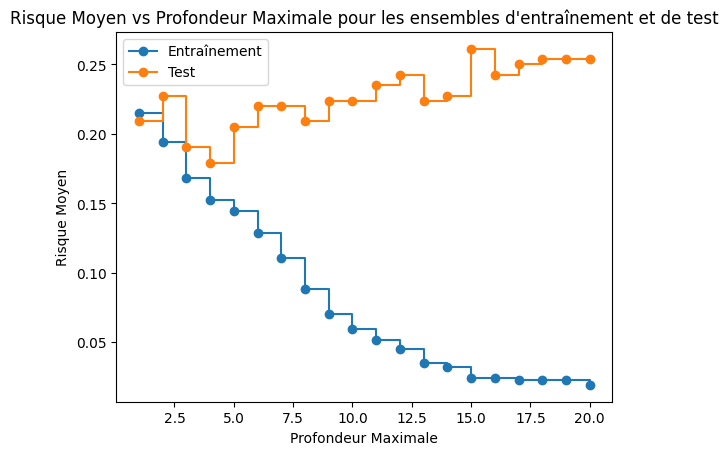

Nombre de feuilles pour le meilleur modèle : 15


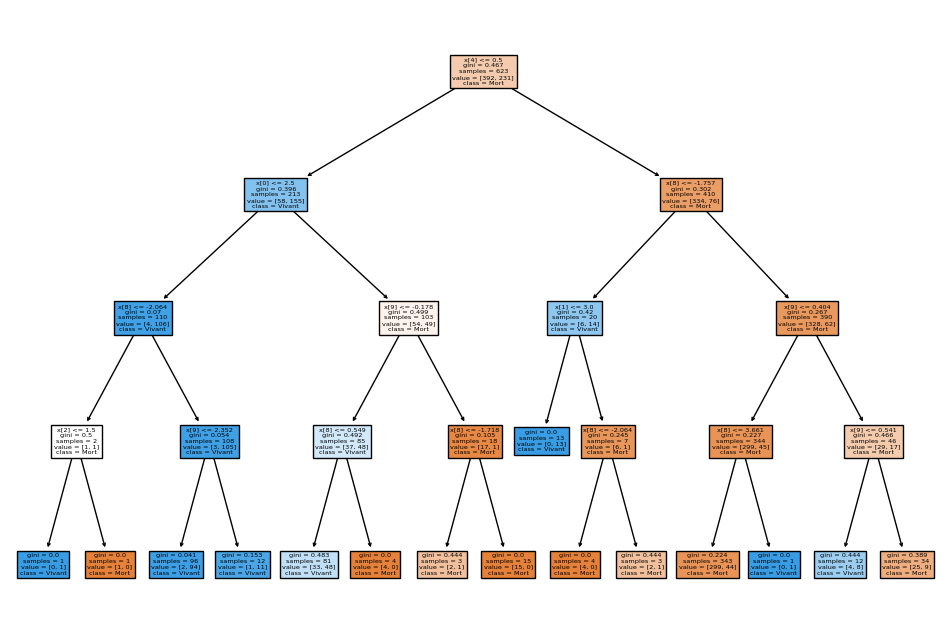

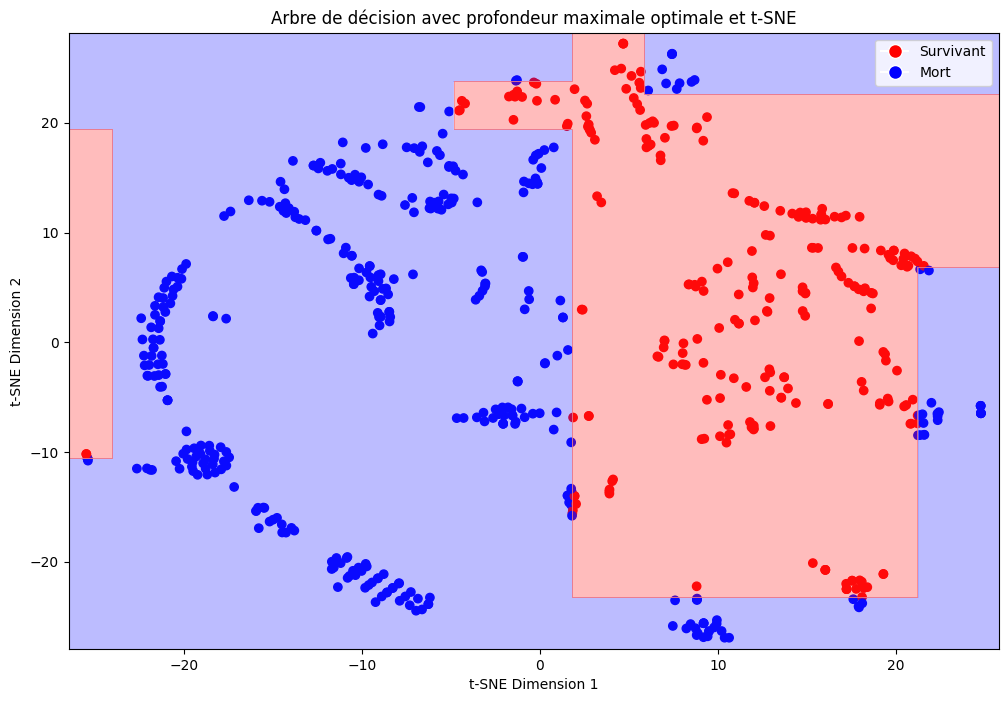

In [69]:
#arbre de decision avec critere de Gini comme condition d'arrêt

DT = DecisionTreeClassifier(random_state=0, criterion='gini')
max_depths = np.arange(1, 21)

# Initialisation des listes pour stocker les résultats
stocks_DT = []
stock_risk_train = []
stock_risk_test = []

for max_depth in max_depths:
    DT_depth = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=max_depth)
    DT_depth.fit(X_train, y_train)
    stocks_DT.append(DT_depth)

    # Risque sur l'ensemble d'entraînement
    YhatTrain = DT_depth.predict(X_train)
    stock_risk_train.append(1 - accuracy_score(y_train, YhatTrain))

    # Risque sur l'ensemble de test
    YhatTest = DT_depth.predict(X_test)
    stock_risk_test.append(1 - accuracy_score(y_test, YhatTest))

# Tracer figure Risque versus Profondeur Maximale
fig, ax = plt.subplots()
ax.set_xlabel("Profondeur Maximale")
ax.set_ylabel("Risque Moyen")
ax.set_title("Risque Moyen vs Profondeur Maximale pour les ensembles d'entraînement et de test")
ax.plot(max_depths, stock_risk_train, marker="o", label="Entraînement", drawstyle="steps-post")
ax.plot(max_depths, stock_risk_test, marker="o", label="Test", drawstyle="steps-post")
ax.legend()
plt.show()

# Sélectionner le modèle avec la meilleure profondeur maximale
best_depth = max_depths[np.argmin(stock_risk_test)]
DT_best_depth = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=best_depth)
DT_best_depth.fit(X_train, y_train)

# Vérifier le nombre de feuilles terminales
nb_leaves_best_depth = DT_best_depth.get_n_leaves()
print('Nombre de feuilles pour le meilleur modèle :', nb_leaves_best_depth)

# Visualiser l'arbre avec la meilleure profondeur maximale
plt.figure(figsize=(12, 8))
plot_tree(DT_best_depth, filled=True, class_names=['Mort', 'Vivant'])
plt.show()

# Appliquer le t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)

# Entraîner le modèle d'arbre de décision avec la meilleure profondeur maximale sur les données transformées par t-SNE
DT_best_depth.fit(X_tsne, y_train)

# Prédire avec le modèle sur les données transformées par t-SNE
predictions_DT_best_depth_tsne = DT_best_depth.predict(X_tsne)
accuracy_DT_best_depth_tsne = accuracy_score(y_train, predictions_DT_best_depth_tsne)
conf_matrix_DT_best_depth_tsne = confusion_matrix(y_train, predictions_DT_best_depth_tsne)

# Tracer les points de données
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=predictions_DT_best_depth_tsne, cmap='bwr', marker='o', label='Prédictions')

# Tracer la frontière de décision avec des couleurs de fond
h = .02  # Pas de la grille
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = DT_best_depth.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Ajouter des couleurs de fond
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)


classes = ["Mort", "Survivant"]
legend_labels = {i: label for i, label in enumerate(classes)}
scatter_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=legend_labels[1])
contour_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=legend_labels[0])
plt.legend(handles=[scatter_legend, contour_legend])

plt.title('Arbre de décision avec profondeur maximale optimale et t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


### Validation croisée sans critère

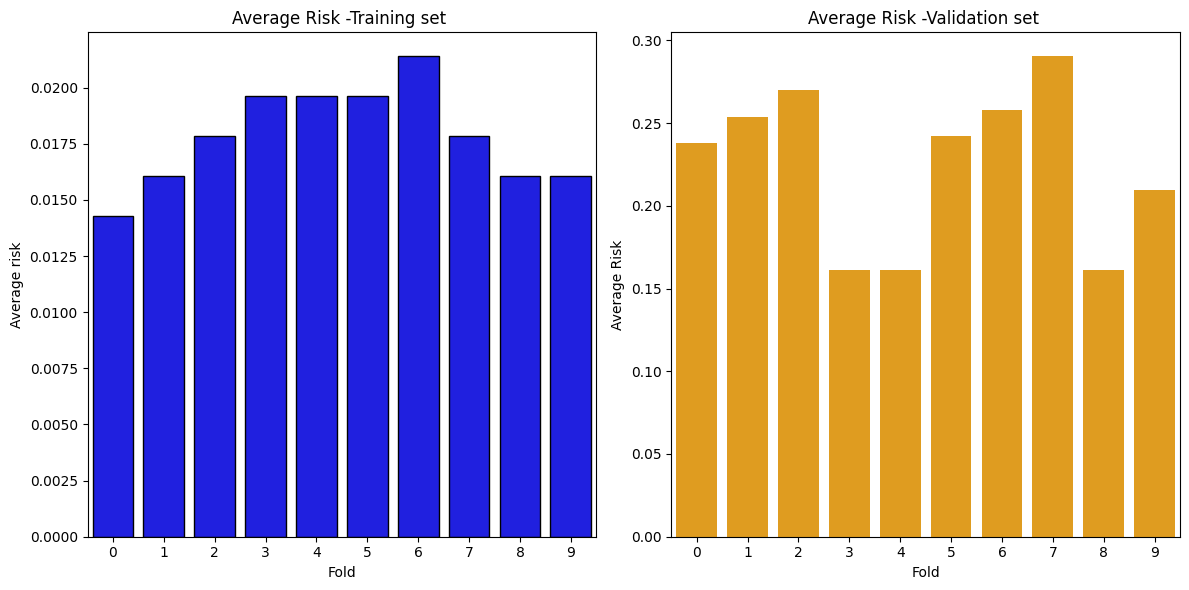

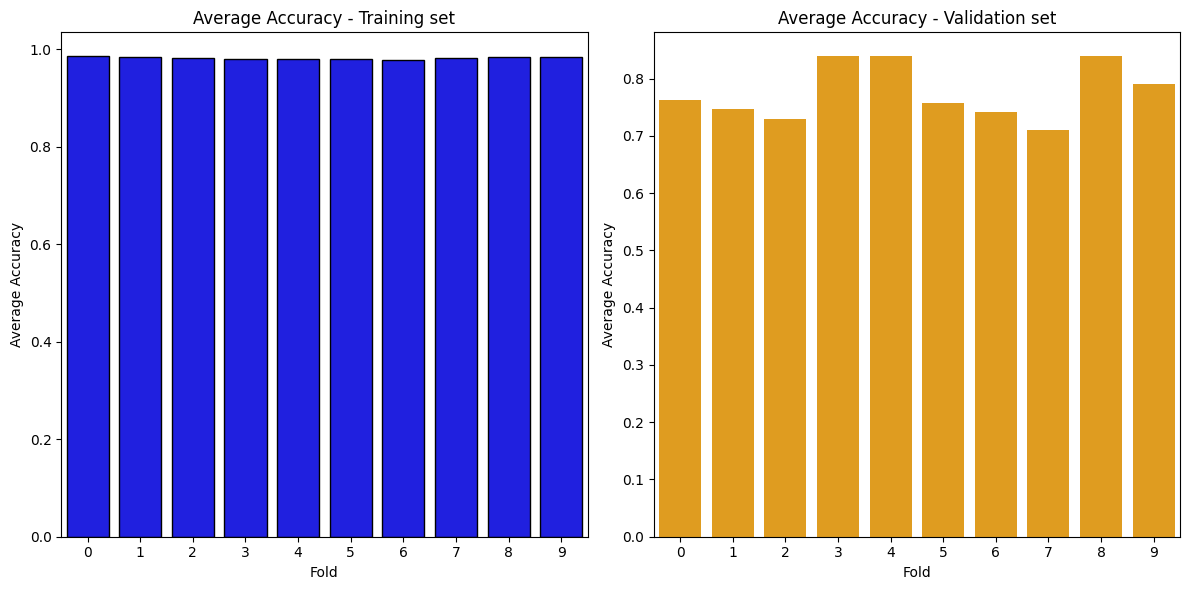

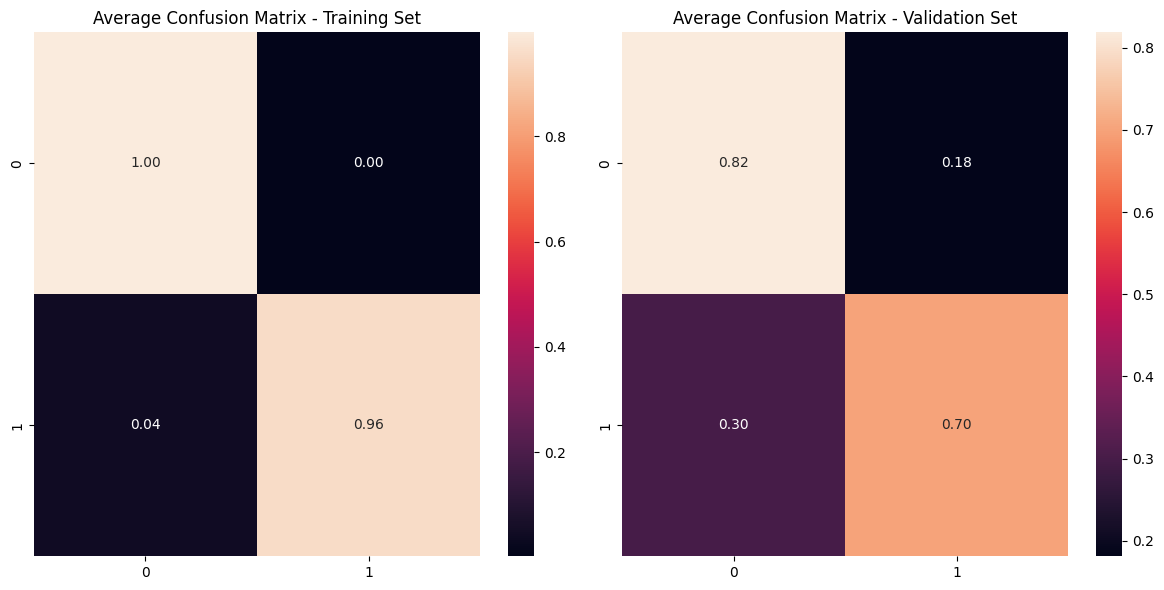

In [105]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


np.random.seed(407)

K = 2

nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

stock_Accuracy_Train_DT = np.zeros(nbFolds)
stock_Accuracy_Val_DT = np.zeros(nbFolds)

stock_Risk_Train_DT = np.zeros(nbFolds)
stock_Risk_Val_DT = np.zeros(nbFolds)

stock_ConfMat_Train_DT = np.zeros((nbFolds, K, K))
stock_ConfMat_Val_DT = np.zeros((nbFolds, K, K))

f = 0

for train, val in kfSplit:
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    DT_model = DecisionTreeClassifier(random_state=0)
    DT_model.fit(XTrain, YRTrain)

    # Prediction sur les échantillons d'entraînement
    YhatTrain_DT = DT_model.predict(XTrain)
    stock_Accuracy_Train_DT[f] = accuracy_score(YRTrain, YhatTrain_DT)
    stock_Risk_Train_DT[f] = 1 - stock_Accuracy_Train_DT[f]  # Calcul du risque
    stock_ConfMat_Train_DT[f, :, :] = confusion_matrix(YRTrain, YhatTrain_DT)

    # Prediction sur les échantillons de test
    YhatVal_DT = DT_model.predict(XVal)
    stock_Accuracy_Val_DT[f] = accuracy_score(YRVal, YhatVal_DT)
    stock_Risk_Val_DT[f] = 1 - stock_Accuracy_Val_DT[f]  # Calcul du risque
    stock_ConfMat_Val_DT[f, :, :] = confusion_matrix(YRVal, YhatVal_DT)

    f = f + 1

# Graphique de l'évolution (Average Risk)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_Risk_Train_DT, color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk -Training set ')
plt.xlabel('Fold')
plt.ylabel('Average risk')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_Risk_Val_DT, color='orange')
plt.title('Average Risk -Validation set ')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.tight_layout()
plt.show()

# Graphique de l'évolution (Average Accuracy)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Train_DT, color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Training set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Val_DT, color='orange')
plt.title('Average Accuracy - Validation set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

# Affichage des matrices de confusion en pourcentages
labels = ['Class ' + str(i + 1) for i in range(K)]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
conf_mat_train_avg = np.mean(stock_ConfMat_Train_DT, axis=0)
conf_mat_train_avg_percent = conf_mat_train_avg / conf_mat_train_avg.sum(axis=1, keepdims=True)
sns.heatmap(conf_mat_train_avg_percent, annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Training Set')

plt.subplot(1, 2, 2)
conf_mat_val_avg = np.mean(stock_ConfMat_Val_DT, axis=0)
conf_mat_val_avg_percent = conf_mat_val_avg / conf_mat_val_avg.sum(axis=1, keepdims=True)
sns.heatmap(conf_mat_val_avg_percent, annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Validation Set')

plt.tight_layout()
plt.show()



Les deux premières figures indiquent le risque moyen sur l'ensemble d'entraînement (Figure 1) et l'ensemble de validation (Figure 2) pour chaque fold.

La faible variabilité sur la première figure suggère que le modèle est très stable sur différents sous-ensembles de données. En effet, le risque moyen reste stable pour la base d'apprentissage se situant autour des 1.75% environ.

En ce qui concerne la deuxième figure(base de test), le risque moyen diminue d'un fold à l'autre mais augmente parfois. Si l'erreur moyen ne faisait que diminuer, cela suggèrerait une amélioration des performances. Ici, le risque diminue parfois et augmente d'autres fois. Le risque d'erreur moyen le plus élevé sur la base de test est 30% environ contre un peu moins de 15% pour le risque moyen le plus faible.
   


Les figures 3 et 4 montrent la précision moyenne sur l'ensemble d'entraînement (Figure 3) et l'ensemble de validation (Figure 4) pour chaque fold.

L'accuracy au niveau de la base d'entraînement et très stable et proche des 100%. En ce qui concerne la base d'apprentissage, elle varie légèrement mais cela reste tres convenable. En effet, l'accuracy pour l'ensemble de validation se situe autour de 80%.


Absolument, ajoutons quelques phrases explicatives supplémentaires pour clarifier davantage les valeurs spécifiques dans la matrice de confusion pour l'ensemble de validation :

---

Finalement, les deux dernières figures présentent la matrice de confusion moyenne sur l'ensemble d'entraînement (Figure 5) et l'ensemble de validation (Figure 6). Pour la Figure 5, la matrice de confusion de l'ensemble d'entraînement, qui représente les résultats d'un modèle de classification binaire, se présente comme suit :


\begin{bmatrix}
1 & 0 \\
0.04 & 0.96
\end{bmatrix}


Ces valeurs détaillent la performance du modèle de Bayes de la manière suivante : le modèle a correctement identifié 100% des échantillons de la classe positive (True Positives), représentant les "survivants". De même, il a atteint une précision de 96% pour la classe négative (True Negatives), associée aux "défunts". Néanmoins, quelques faiblesses subsistent, avec 14% des échantillons positifs classés incorrectement comme négatifs (False Negatives) et 4% des échantillons négatifs classés à tort comme positifs (False Positives). En d'autres termes, aucune personne survivante n'a été erroneusement catégorisée comme "décédée", mais 4% des personnes décédées ont été incorrectement classées comme "survivantes".

La matrice de confusion pour l'ensemble de validation, présentée dans la Figure 6, reproduit les mêmes proportions que celle de l'ensemble d'entraînement :


\begin{bmatrix}
0.82 & 0.18 \\
0.30 & 0.70
\end{bmatrix}


Dans cette matrice, le chiffre 0.82 représente la proportion de vrais positifs (True Positives) parmi tous les échantillons réellement positifs de l'ensemble de validation. Cela signifie que le modèle a correctement identifié 82% des survivants. De même, le chiffre 0.70 indique la proportion de vrais négatifs (True Negatives) parmi tous les échantillons réellement négatifs, montrant que le modèle a correctement identifié 70% des non-survivants. Les valeurs 0.30 et 0.18 représentent respectivement les taux de faux négatifs (False Negatives) et de faux positifs (False Positives), indiquant les erreurs du modèle en classifiant à tort certains échantillons.


Ces résultats suggèrent que le modèle pourrait présenter des signes de surajustement, notamment en raison de l'absence d'un critère d'arrêt spécifique lors de la validation croisée avec le modèle d'arbre de décision. C'est pour cette raison que nous nous retrouvons avec une Accuracy proche de 100% pour la base d'apprentissage et une bien plus faible pour la base de test. En effet, cette approche non restreinte peut conduire à une adaptation excessive aux données d'entraînement, limitant ainsi la capacité du modèle à bien généraliser sur de nouvelles données. Ainsi, l'optimisation des hyperparamètres, tels que la profondeur maximale de l'arbre, pourrait être envisagée pour améliorer la capacité de généralisation du modèle. En fin de compte, cette problématique est souvent associée au surajustement(overfitting), un phénomène où le modèle s'adapte trop étroitement aux données d'entraînement spécifiques au détriment de sa capacité à généraliser sur des données inédites.

## Random Forest

Dans le cadre de notre projet, nous avons choisi d'explorer les capacités du classifieur Random Forest, une technique puissante et polyvalente en apprentissage automatique. Le Random Forest, ou "forêt aléatoire" en français, tire son efficacité de la combinaison de multiples arbres de décision, chacun entraîné sur des sous-ensembles aléatoires de notre ensemble de données.

Le fonctionnement du Random Forest repose sur deux principaux concepts : l'agrégation (ou "bagging") et la sélection aléatoire de caractéristiques. Tout d'abord, plusieurs arbres de décision sont construits, chacun sur un échantillon aléatoire de notre ensemble de données. Ensuite, ces arbres individuels votent pour la classe d'appartenance d'une observation donnée. La classe finale attribuée est celle qui reçoit le plus grand nombre de votes parmi l'ensemble des arbres.

L'utilisation de multiples arbres de décision et de l'échantillonnage aléatoire contribuent à réduire le surajustement (overfitting) inhérent à un arbre de décision unique. Cela rend le Random Forest plus robuste et généralement moins sensible aux fluctuations aléatoires dans les données.

Un autre aspect clé du Random Forest est sa capacité à mesurer l'importance relative des différentes caractéristiques dans la prise de décision. Cette information peut être cruciale pour identifier les caractéristiques les plus informatives dans notre ensemble de données.

Nous allons maintenant appliquer le classifieur Random Forest à notre base de données. Une fois entraîné, nous évaluerons ses performances, examinerons son arborescence de décision pour comprendre ses processus internes, et utiliserons des techniques de visualisation telles que le t-SNE pour représenter graphiquement les résultats.


Accuracy du modèle Random Forest: 0.00


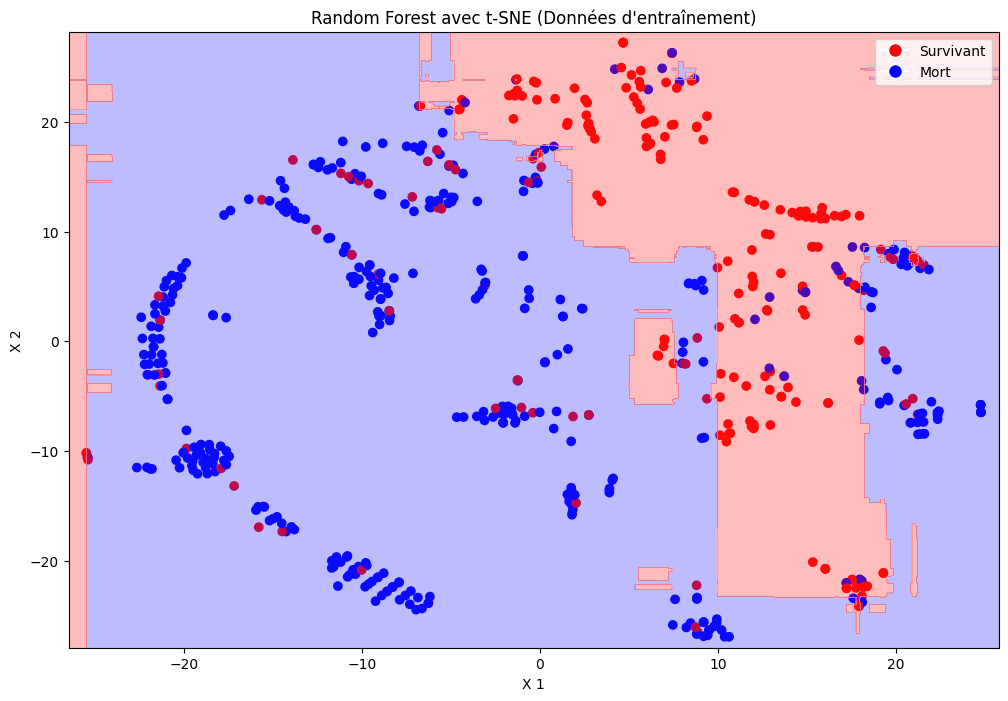

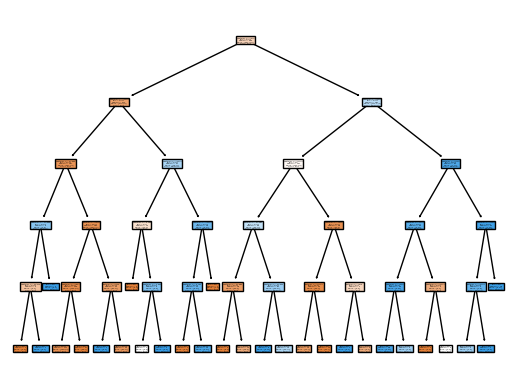

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, random_state=0)
model_rf.fit(X_train, y_train)

# Prédictions sur les données de test
predictions_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
conf_matrix_rf = confusion_matrix(y_test, predictions_rf)

print(f'Accuracy du modèle Random Forest: {accuracy_rf:.2f}')

# Appliquer le t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2)
X_tsne_rf = tsne.fit_transform(X_train)


model_rf.fit(X_tsne_rf, y_train)

# Tracer les points de données
plt.figure(figsize=(12, 8))

plt.scatter(X_tsne_rf[:, 0], X_tsne_rf[:, 1], c=y_train, cmap='bwr', marker='o', label='Données d\'entraînement')

# Tracer la frontière de décision avec des couleurs de fond
h = .02
x_min, x_max = X_tsne_rf[:, 0].min() - 1, X_tsne_rf[:, 0].max() + 1
y_min, y_max = X_tsne_rf[:, 1].min() - 1, X_tsne_rf[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Ajouter des couleurs de fond
plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)

# Création d'une légende personnaliséee
classes = ["Mort", "Survivant"]
legend_labels = {i: label for i, label in enumerate(classes)}
scatter_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=legend_labels[1])
contour_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=legend_labels[0])
plt.legend(handles=[scatter_legend, contour_legend])

plt.title('Random Forest avec t-SNE (Données d\'entraînement)')
plt.xlabel('X 1')
plt.ylabel('X 2')
plt.show()

# Affichage d'un arbre de la forêt (ici le premier arbre)
tree = model_rf.estimators_[0]
plot_tree(tree, filled=True, class_names=['Mort', 'Survivant'], feature_names=['Feature 1', 'Feature 2'])
plt.show()


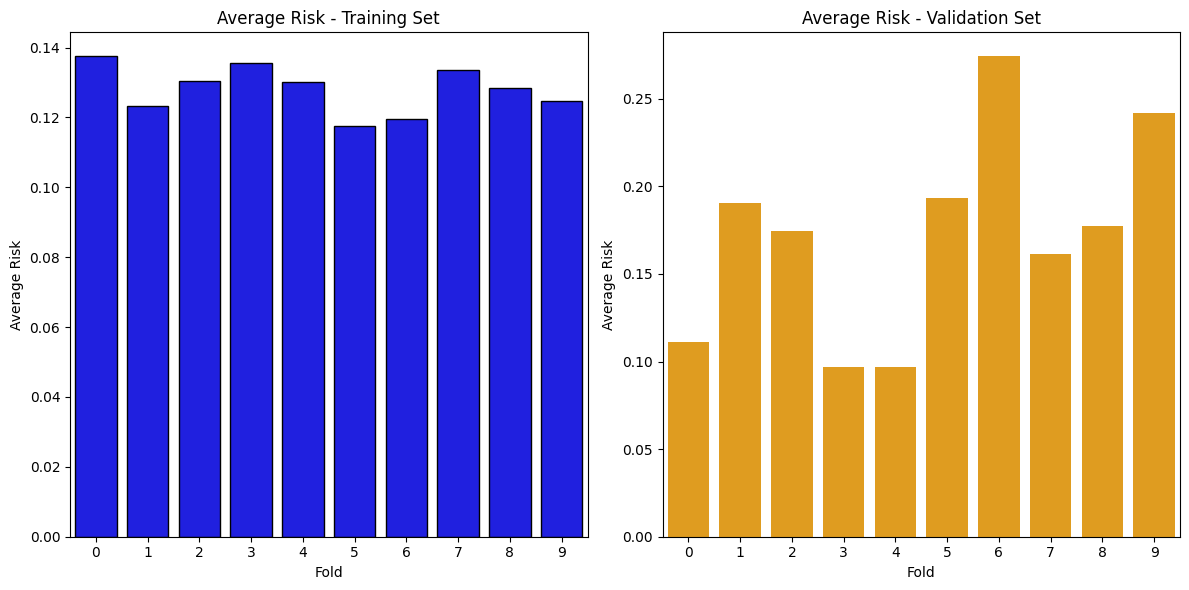

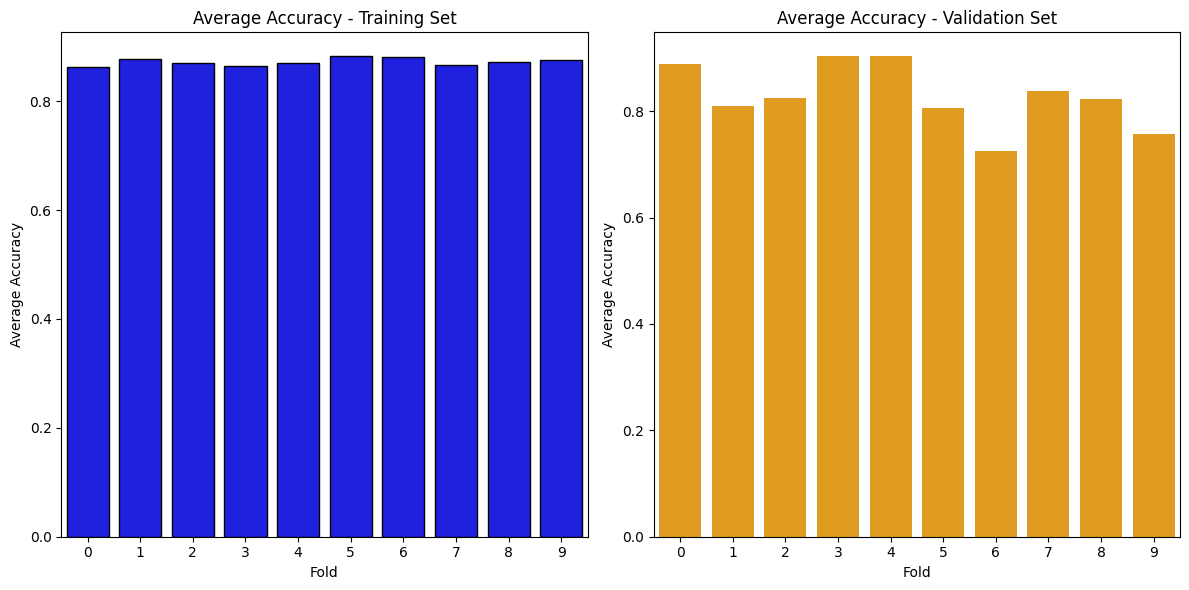

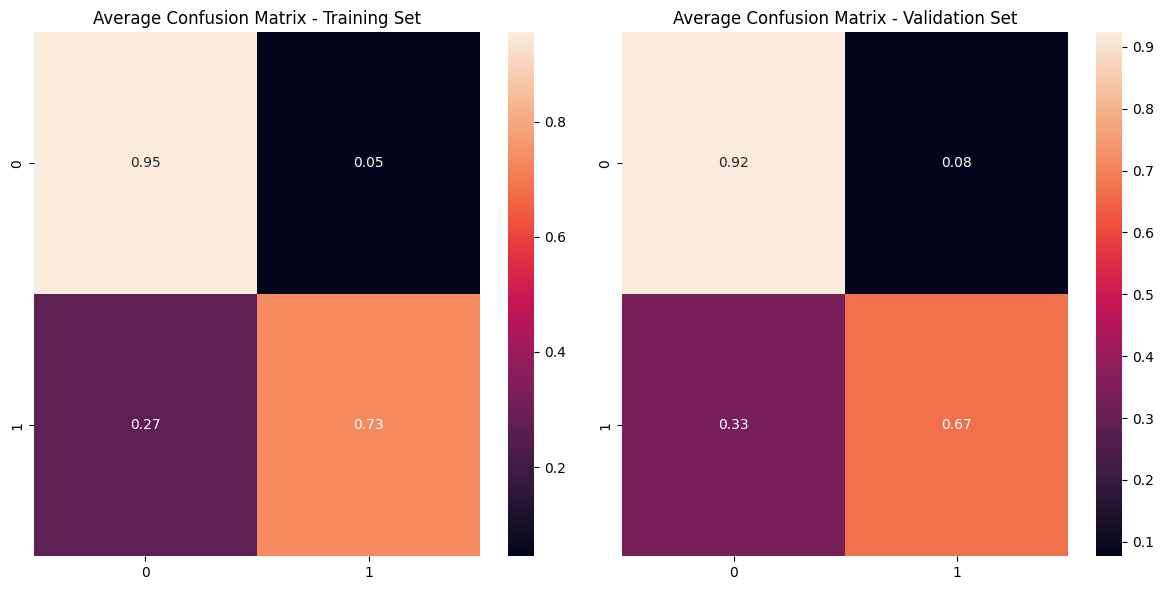

In [107]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(407)


K = 2


nbFolds = 10
kf = KFold(n_splits=nbFolds, shuffle=True)
kfSplit = kf.split(X_train)

# Initialisation des tableaux pour stocker les résultats de chaque fold
stock_average_risk_Train_rf = np.zeros((nbFolds, 1))
stock_average_risk_Val_rf = np.zeros((nbFolds, 1))

stock_RiskPerClass_Train_rf = np.zeros((nbFolds, K))
stock_RiskPerClass_Val_rf = np.zeros((nbFolds, K))

stock_Accuracy_Train_rf = np.zeros(nbFolds)
stock_Accuracy_Val_rf = np.zeros(nbFolds)

stock_AccPerClass_Train_rf = np.zeros((nbFolds, K))
stock_AccPerClass_Val_rf = np.zeros((nbFolds, K))

stock_ConfMat_Train_rf = np.zeros((nbFolds, K, K))
stock_ConfMat_Val_rf = np.zeros((nbFolds, K, K))

f = 0

# Boucle sur les folds
for train, val in kfSplit:
    XTrain, XVal, YRTrain, YRVal = X_train[train, :], X_train[val, :], y_train[train], y_train[val]

    # Entraîner le modèle Random Forest
    model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, random_state=0)
    model_rf.fit(XTrain, YRTrain)

    # Prédiction sur les données d'entraînement
    YhatTrain_rf = model_rf.predict(XTrain)
    stock_average_risk_Train_rf[f, 0] = 1 - accuracy_score(YRTrain, YhatTrain_rf)
    stock_RiskPerClass_Train_rf[f, :] = 1 - np.array([accuracy_score(YRTrain[YRTrain == 0], YhatTrain_rf[YRTrain == 0]),
                                                     accuracy_score(YRTrain[YRTrain == 1], YhatTrain_rf[YRTrain == 1])])
    stock_Accuracy_Train_rf[f] = accuracy_score(YRTrain, YhatTrain_rf)
    stock_AccPerClass_Train_rf[f, :] = np.array([accuracy_score(YRTrain[YRTrain == 0], YhatTrain_rf[YRTrain == 0]),
                                                 accuracy_score(YRTrain[YRTrain == 1], YhatTrain_rf[YRTrain == 1])])
    stock_ConfMat_Train_rf[f, :, :] = confusion_matrix(YRTrain, YhatTrain_rf)

    # Prédiction sur les données de validation
    YhatVal_rf = model_rf.predict(XVal)
    stock_average_risk_Val_rf[f, 0] = 1 - accuracy_score(YRVal, YhatVal_rf)
    stock_RiskPerClass_Val_rf[f, :] = 1 - np.array([accuracy_score(YRVal[YRVal == 0], YhatVal_rf[YRVal == 0]),
                                                   accuracy_score(YRVal[YRVal == 1], YhatVal_rf[YRVal == 1])])
    stock_Accuracy_Val_rf[f] = accuracy_score(YRVal, YhatVal_rf)
    stock_AccPerClass_Val_rf[f, :] = np.array([accuracy_score(YRVal[YRVal == 0], YhatVal_rf[YRVal == 0]),
                                               accuracy_score(YRVal[YRVal == 1], YhatVal_rf[YRVal == 1])])
    stock_ConfMat_Val_rf[f, :, :] = confusion_matrix(YRVal, YhatVal_rf)

    f = f + 1



# plot average risk
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Train_rf.ravel(), color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Risk - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_average_risk_Val_rf.ravel(), color='orange')
plt.title('Average Risk - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Risk')

plt.tight_layout()
plt.show()

# plot average accuracy avec la moyenne de tout les fold
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Train_rf, color='blue', ci='sd', errwidth=1, capsize=0.1, errcolor='black', edgecolor='black', linewidth=1)
plt.title('Average Accuracy - Training Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.subplot(1, 2, 2)
sns.barplot(x=np.arange(nbFolds), y=stock_Accuracy_Val_rf, color='orange')
plt.title('Average Accuracy - Validation Set')
plt.xlabel('Fold')
plt.ylabel('Average Accuracy')

plt.tight_layout()
plt.show()

# Affichage des matrices de confusion en pourcentages
labels = ['Class ' + str(i + 1) for i in range(K)]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
conf_mat_train_avg = np.mean(stock_ConfMat_Train_rf, axis=0)
conf_mat_train_avg_percent = conf_mat_train_avg / conf_mat_train_avg.sum(axis=1, keepdims=True)
sns.heatmap(conf_mat_train_avg_percent, annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Training Set')

plt.subplot(1, 2, 2)
conf_mat_val_avg = np.mean(stock_ConfMat_Val_rf, axis=0)
conf_mat_val_avg_percent = conf_mat_val_avg / conf_mat_val_avg.sum(axis=1, keepdims=True)
sns.heatmap(conf_mat_val_avg_percent, annot=True, fmt=".2f")
plt.title('Average Confusion Matrix - Validation Set')

plt.tight_layout()
plt.show()







Les deux premières figures indiquent le risque moyen sur l'ensemble d'entraînement (Figure 1) et l'ensemble de validation (Figure 2) pour chaque fold.

La faible variabilité sur la première figure suggère que le modèle est stable sur différents sous-ensembles de données. En effet, le risque moyen reste stable pour la base d'apprentissage se situant autour des 13% environ.

En ce qui concerne la deuxième figure(base de test), le risque moyen diminue d'un fold à l'autre mais augemente parfois. Si l'erreur moyen ne faisait que diminuer, cela suggèrerait une amélioration des performances. Ici, le risque diminue parfois et augmente d'autres fois. Le risque d'erreur moyen le plus élevé sur la base de test est d'un peu plus de 25%  contre environ 10% pour le risque moyen le plus faible.
   


Les figures 3 et 4 montrent la précision moyenne sur l'ensemble d'entraînement (Figure 3) et l'ensemble de validation (Figure 4) pour chaque fold.

L'accuracy au niveau de la base d'entraînement et très stable, autour d'un peu plus de 80%. En ce qui concerne la base d'apprentissage, elle varie légèrement mais cela reste tres convenable. En effet, l'accuracy pour l'ensemble de valisation se situe également autour de 80%.


Finalement, les deux dernières figures présentent la matrice de confusion moyenne sur l'ensemble d'entraînement (Figure 5) et l'ensemble de validation (Figure 6).
Pour la figure 5, La matrice de confusion pour l'ensemble d'entraînement, affichant les résultats d'un modèle de classification binaire, est représentée par ces valeurs:\begin{bmatrix} 0.95 & 0.05 \\ 0.27 & 0.73 \end{bmatrix} Ces chiffres décrivent la performance du modèle de Bayes de la manière suivante : 95% des échantillons de la classe positive ont été correctement identifiés (True Positives), et 73% des échantillons de la classe négative ont également été correctement identifiés (True Negatives). La classe positive est la classe des "survivants", tandis que la classe négative est "celle des morts". Cependant, le modèle a présenté quelques faiblesses, en classant incorrectement 5% des échantillons positifs comme négatifs (False Negatives) et 27% des échantillons négatifs comme positifs (False Positives). Autrement dit 5% des personnes survivantes ont été classées comme "mortes" d'après le modèle et 27% des personnes "mortes" ont été classées "survivantes".

La matrice de confusion pour l'ensemble de validation, affichant les résultats d'un modèle de classification binaire, est identique à celle de l'ensemble d'entraînement, soit  \begin{bmatrix} 0.92 & 0.08 \\ 0.33 & 0.67 \end{bmatrix} \.
Ces valeurs représentent la performance du modèle sur l'ensemble de validation, indiquant que le modèle a bien généralisé ses capacités de classification sur des données non vues. Les chiffres reflètent des performances similaires à celles de l'ensemble d'entraînement, avec 92% de précision pour la classe positive et 67% pour la classe négative. Les erreurs de classification, représentées par les valeurs 0.08 et 0.33, révèlent également des résultats cohérents avec ceux de l'ensemble d'entraînement.

Le modèle semble donc maintenir des performances équilibrées sur des données inconnues.

## Classifieur Non Supervisé - K-Means

<!-- Nous applique nos conaissence qui a été developé pendant le semestre et utiliser un classifieur non superviosne meme si nous savons le label e combien de classe... -->

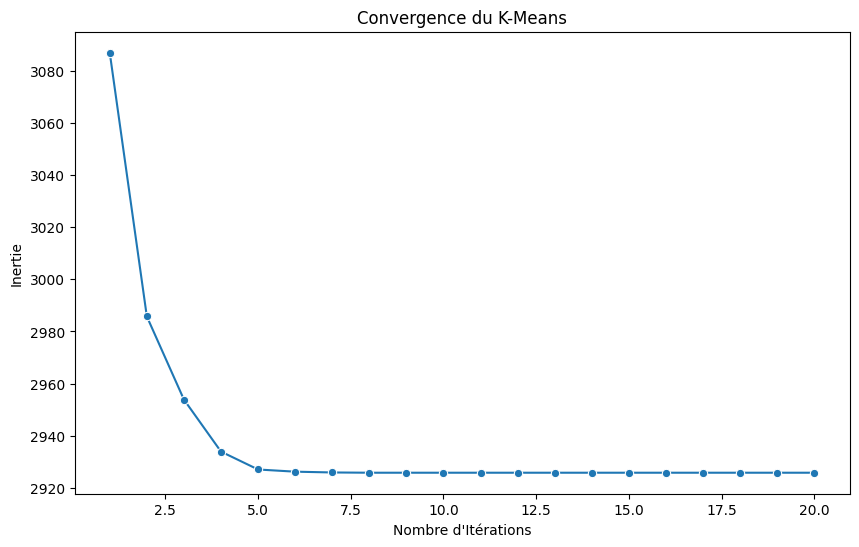

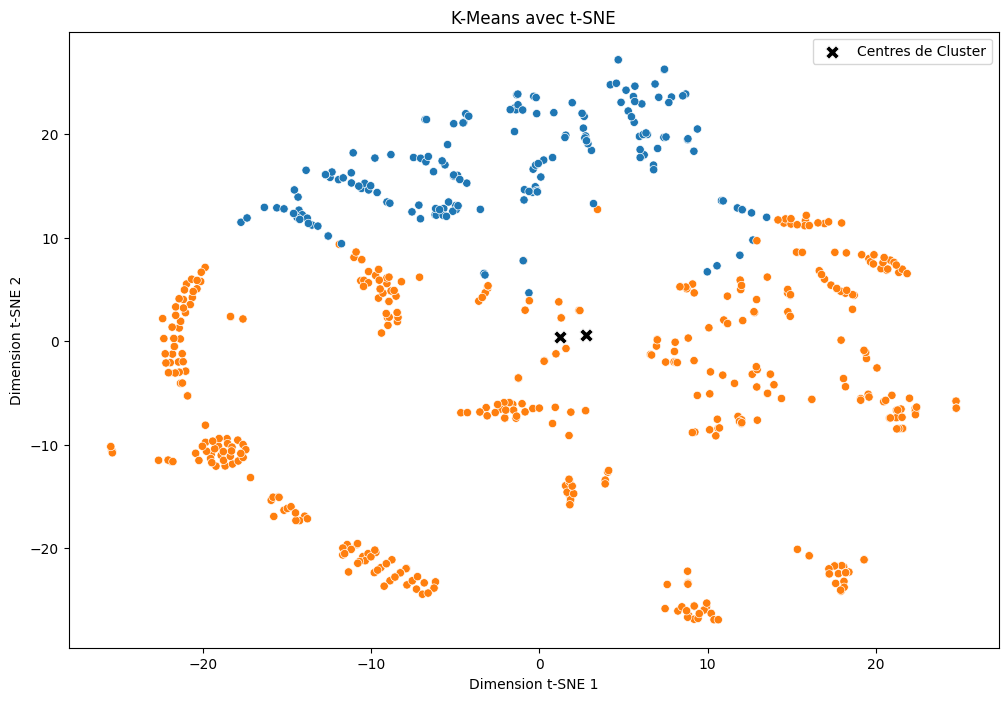

In [109]:
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.manifold import TSNE

# Appliquer le t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)

# Configurer le modèle K-Means
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=100, random_state=42)

# Initialiser une liste pour stocker les inerties à chaque itération
inertias = []

# Entraîner le K-Means et enregistrer l'inertie à chaque itération
for i in range(1, 21):
    kmeans.set_params(n_init=1, max_iter=i)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

# Tracer le graphique de convergence à l'aide de Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 21), y=inertias, marker='o')
plt.title('Convergence du K-Means')
plt.xlabel('Nombre d\'Itérations')
plt.ylabel('Inertie')
plt.show()

# Prédire les clusters avec le modèle K-Means sur les données transformées par t-SNE
predictions_kmeans = kmeans.predict(X_train)

# Tracer les points de données avec seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=predictions_kmeans, palette='tab10', marker='o', legend=False)

# Tracer les centres de cluster
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='X', s=100, color='black', label='Centres de Cluster')

plt.title('K-Means avec t-SNE')
plt.xlabel('Dimension t-SNE 1')
plt.ylabel('Dimension t-SNE 2')
plt.legend()
plt.show()




Le premier graphique illustre la convergence de l'algorithme K-Means au fil des itérations. L'inertie, mesurée sur l'axe des ordonnées, diminue progressivement à mesure que le nombre d'itérations augmente. L'inertie mesure la somme des carrés des distances entre les échantillons et le centre du cluster auquel ils sont assignés. La décroissance de l'inertie suggère que le modèle converge vers une configuration stable à mesure que l'algorithme est répété. Cela témoigne de l'efficacité de l'algorithme K-Means dans la formation de clusters distincts.


Le deuxième ensemble de graphiques utilise le t-SNE pour réduire les données d'entraînement à deux dimensions, permettant ainsi une visualisation des clusters. Les points de données sont colorés en fonction des clusters prédits par l'algorithme K-Means. Les centres des clusters sont également affichés. Cette représentation graphique facilite l'observation visuelle des groupes formés par l'algorithme.



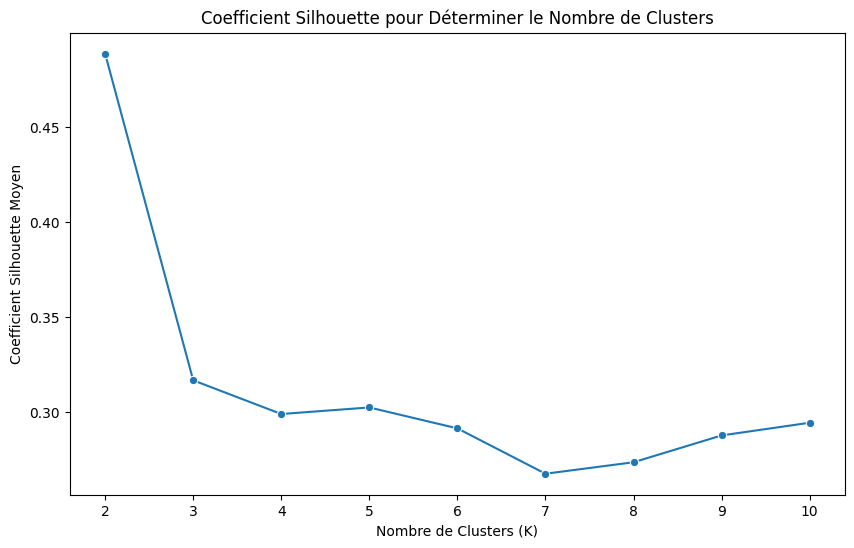

Nombre idéal de clusters (K) avec Silhouette : 2


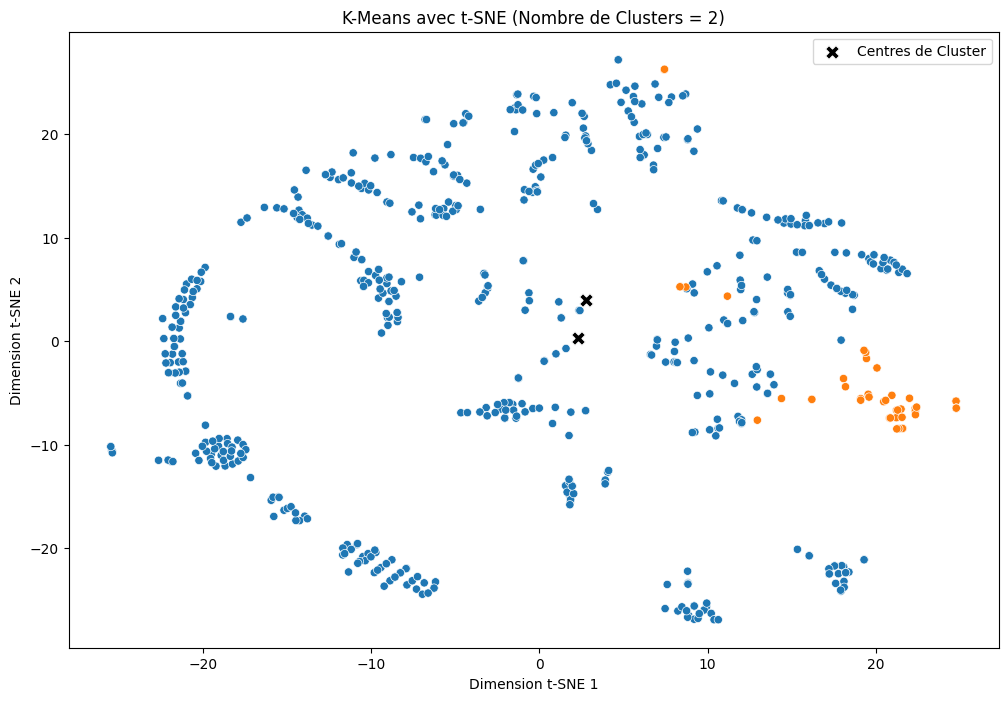

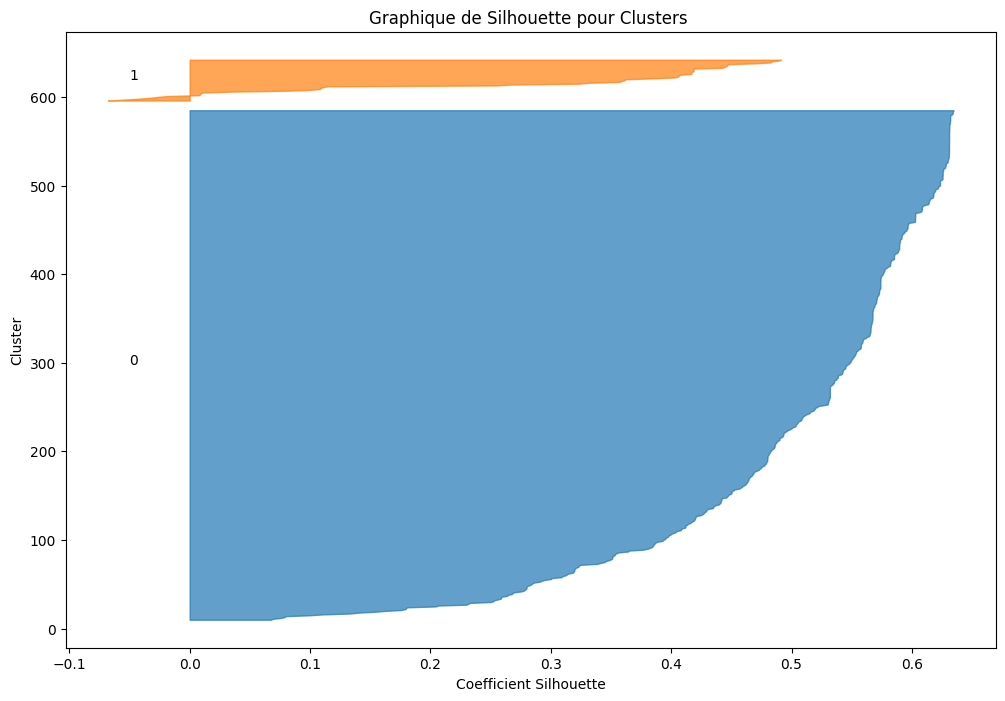

In [108]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Appliquer le t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)

# Trouver le nombre optimal de clusters en utilisant le coefficient de Silhouette
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    predictions = kmeans.predict(X_train)
    silhouette_avg = silhouette_score(X_train, predictions)
    silhouette_scores.append(silhouette_avg)

# Tracer le graphique de Silhouette pour déterminer le nombre optimal de clusters
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, 11), y=silhouette_scores, marker='o')
plt.title('Coefficient Silhouette pour Déterminer le Nombre de Clusters')
plt.xlabel('Nombre de Clusters (K)')
plt.ylabel('Coefficient Silhouette Moyen')
plt.show()

# Choisir le nombre de clusters avec le plus grand coefficient de Silhouette
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 parce que nous commençons avec k=2
print(f'Nombre idéal de clusters (K) avec Silhouette : {optimal_k}')

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train)

# Configurer K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=100, random_state=42)
kmeans.fit(X_train)

# Prédire les clusters
predictions_kmeans = kmeans.predict(X_train)

# Tracer les points de données avec seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=predictions_kmeans, palette='tab10', marker='o', legend=False)

# Tracer les centres de cluster
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='X', s=100, color='black', label='Centres de Cluster')

plt.title('K-Means avec t-SNE (Nombre de Clusters = {})'.format(optimal_k))
plt.xlabel('Dimension t-SNE 1')
plt.ylabel('Dimension t-SNE 2')
plt.legend()
plt.show()

# Configurer K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=100, random_state=42)
kmeans.fit(X_train)

# Prédire les clusters
predictions_kmeans = kmeans.predict(X_train)

# Calculer le coefficient Silhouette pour chaque observation
silhouette_values = silhouette_samples(X_train, predictions_kmeans)

# Tracer le graphique de Silhouette pour chaque observation
plt.figure(figsize=(12, 8))
y_lower = 10
for i in range(optimal_k):
    # Agréger les valeurs Silhouette pour les clusters individuels
    cluster_silhouette_values = silhouette_values[predictions_kmeans == i]
    cluster_silhouette_values.sort()

    # Calculer y_upper pour chaque cluster
    y_upper = y_lower + len(cluster_silhouette_values)

    # Couleur pour chaque cluster
    color = sns.color_palette('tab10')[i]

    # Remplir la zone entre y_lower et y_upper avec la couleur du cluster
    plt.fill_betweenx(y=np.arange(y_lower, y_upper), x1=0, x2=cluster_silhouette_values, color=color, alpha=0.7)

    # Étiquettes pour indiquer la valeur moyenne de Silhouette dans chaque cluster
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_values), str(i))

    # Mettre à jour y_lower pour le prochain cluster
    y_lower = y_upper + 10  # 10 pour l'écart entre les clusters

plt.title('Graphique de Silhouette pour Clusters ')
plt.xlabel('Coefficient Silhouette')
plt.ylabel('Cluster')
plt.show()




L'application de l'algorithme t-SNE pour réduire les données à deux dimensions a permis une représentation visuelle des clusters. En utilisant le coefficient de silhouette comme critère d'évaluation, le processus itératif de K-Means a été employé pour déterminer le nombre optimal de clusters. Le graphique de silhouette présenté ci-dessus illustre ces résultats.

Le coefficient de silhouette mesure à quel point chaque point d'un cluster est similaire aux points du même cluster par rapport aux clusters voisins. Il varie de -1 à 1, où une valeur élevée indique que l'objet est bien apparié à son propre cluster et mal apparié aux clusters voisins. Ainsi, un coefficient de silhouette proche de 1 indique une configuration de cluster appropriée.

Le graphique de silhouette montre que le coefficient atteint son maximum lorsque le nombre de clusters (K) est égal à 2. Cela suggère que diviser les données en deux clusters est la configuration qui maximise la similarité intra-cluster tout en minimisant la similarité inter-cluster. La délimitation des points dans ces deux clusters est marquée par des lignes de silhouette bien définies.

La visualisation t-SNE du K-Means avec deux clusters est présentée dans le deuxième graphique. Les points de données sont colorés en fonction de leur attribution à l'un des deux clusters, et les centres de cluster sont marqués par des croix noires. La séparation nette entre les deux clusters suggère que le modèle a réussi à identifier deux groupes distincts dans les données.

Le graphique de silhouette détaillé, en bas, offre une compréhension supplémentaire de la qualité de la partition en deux clusters. Chaque bande colorée représente un cluster, et la largeur de chaque bande correspond à la densité des points dans le cluster. Les lignes pointillées indiquent la silhouette moyenne pour chaque cluster. Dans l'ensemble, des silhouettes bien définies et des coefficients élevés confirment la cohérence et la validité de la partition en deux clusters.

En conclusion, l'analyse visuelle des résultats du coefficient de silhouette pour 2 clusters révèle une partition nette et significative des données, indiquant que cette configuration particulière est la plus appropriée pour représenter la structure intrinsèque des données.

##Analyse du meilleur classifieur


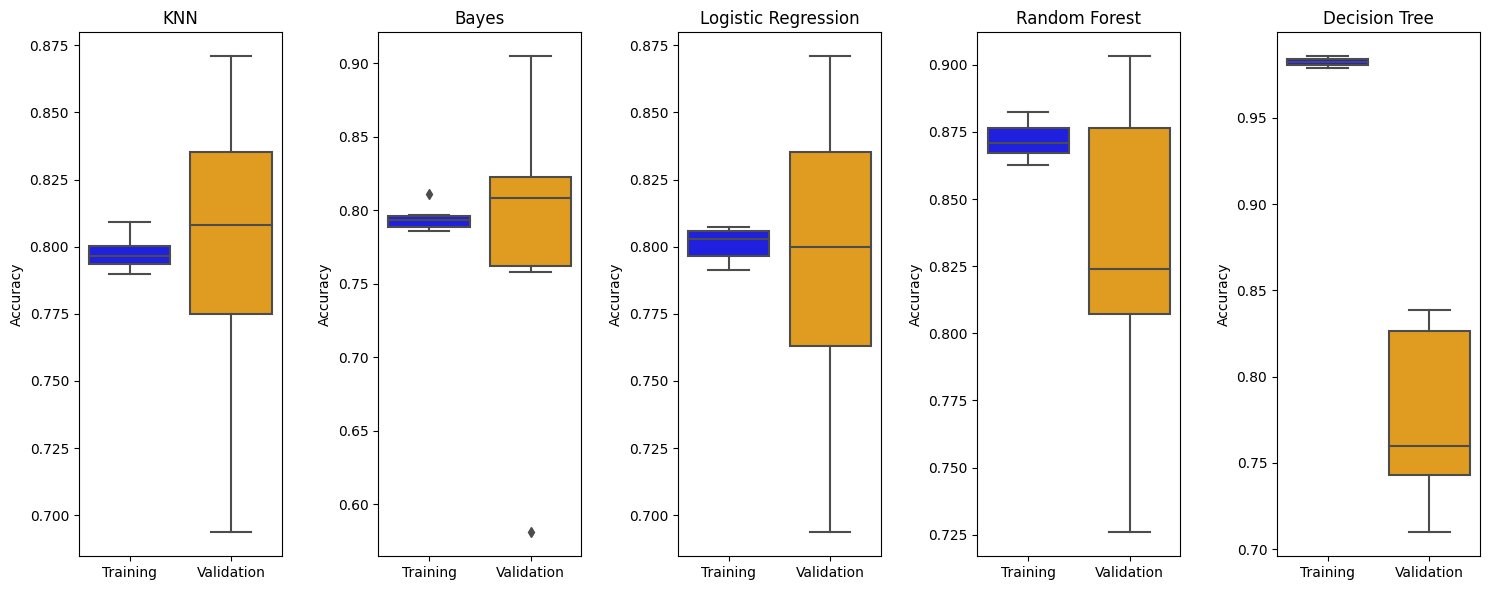

In [110]:
import seaborn as sns

# Boxplots for Accuracy Comparison
plt.figure(figsize=(15, 6))

# Boxplot for KNN
plt.subplot(1, 5, 1)
sns.boxplot(data=[stock_Accuracy_Train, stock_Accuracy_Val], palette=['blue', 'orange'])
plt.title('KNN')
plt.xticks([0, 1], ['Training', 'Validation'])
plt.ylabel('Accuracy')

# Boxplot for Bayes
plt.subplot(1, 5, 2)
sns.boxplot(data=[stock_Accuracy_Train_bayes.ravel(), stock_Accuracy_Val_bayes.ravel()], palette=['blue', 'orange'])
plt.title('Bayes')
plt.xticks([0, 1], ['Training', 'Validation'])
plt.ylabel('Accuracy')

# Boxplot for Logistic Regression
plt.subplot(1, 5, 3)
sns.boxplot(data=[stock_Accuracy_Train_rl.ravel(), stock_Accuracy_Val_rl.ravel()], palette=['blue', 'orange'])
plt.title('Logistic Regression')
plt.xticks([0, 1], ['Training', 'Validation'])
plt.ylabel('Accuracy')

# Boxplot for Decision Tree
plt.subplot(1, 5, 5)
sns.boxplot(data=[stock_Accuracy_Train_DT.ravel(), stock_Accuracy_Val_DT.ravel()], palette=['blue', 'orange'])
plt.title('Decision Tree')
plt.xticks([0, 1], ['Training', 'Validation'])
plt.ylabel('Accuracy')


# Boxplot for Random Forest
plt.subplot(1, 5, 4)
sns.boxplot(data=[stock_Accuracy_Train_rf.ravel(), stock_Accuracy_Val_rf.ravel()], palette=['blue', 'orange'])
plt.title('Random Forest')
plt.xticks([0, 1], ['Training', 'Validation'])
plt.ylabel('Accuracy')

# Add similar code for other classifiers

# Add a bit more space between subplots
plt.tight_layout(w_pad=2)

# Show the plots
plt.show()


# Analyse des Résultats des Classifieurs

Les résultats des différents classifieurs après la validation croisée mettent en lumière des caractéristiques distinctes de chaque modèle.

Tout d'abord, le classifieur **K-NN** présente une variabilité significative de ses performances sur les ensembles de validation, avec des médianes oscillant entre environ 74.6% et 85.5%. Cette sensibilité aux différentes compositions des ensembles de validation suggère une dépendance aux configurations spécifiques des données et peut indiquer une adaptabilité limitée du modèle.

En revanche, le classifieur **Bayes** se distingue par une stabilité plus prononcée de ses performances, affichant des médianes d'accuracy relativement constantes entre environ 75.8% et 90.5%. Cette cohérence suggère une meilleure généralisation du modèle à différents ensembles de données de validation.

La **Régression Logistique** offre des performances compétitives avec des médianes d'accuracy autour de 77.8% à 87.1%.

Le **Decision Tree (Arbre de Décision)**, bien que présentant des performances élevées avec des médianes allant jusqu'à 83.9%, montre également une certaine variabilité, indiquant une sensibilité à la configuration spécifique des données.

Enfin, le classifieur **Random Forest** affiche une performance élevée, avec des médianes d'accuracy allant jusqu'à 90.3%. Cependant, une légère variabilité est également observée.

En considérant ces observations, le choix du meilleur classifieur dépend de plusieurs facteurs. Si la stabilité et la généralisation sont des priorités, le classifieur **Bayes** pourrait être préféré en raison de sa performance constante. Cependant, si des performances globales plus élevées sont la priorité et que la légère variabilité est acceptable, le classifieur **Random Forest** pourrait être privilégié. La **Régression Logistique** offre une alternative équilibrée avec des performances compétitives et une stabilité relative.


## Choix Final

Après une analyse approfondie des performances, nous décidons de choisir le classifieur avec la médiane la plus élevée sur les ensembles de validation. Ainsi, le classifieur **Bayes** est retenu comme le choix final pour être appliqué sur notre base de test, en raison de son équilibre entre stabilité et performances globales élevées.Ainsi, en choisissant le classifieur Bayesien comme modèle final, nous visons à garantir une généralisation optimale et des performances fiables dans des situations réelles, tout en maintenant une stabilité élevée. Cette décision est alignée avec l'objectif d'obtenir des résultats prédictifs robustes et cohérents lors de l'application du modèle sur la base de test.

Cependant, il est important de noter que si le choix se faisait entre deux modèles comparables en termes de performances globales, nous aurions également examiné attentivement les matrices de confusion pour prendre une décision éclairée.
Imaginons que le choix se soit posé entre le classifieur K-NN et la régression logistique, des modèles offrant des performances compétitives. Dans un tel scénario, l'analyse des matrices de confusion aurait été cruciale. En particulier, nous aurions examiné les erreurs liées à la prédiction de la survie, en mettant l'accent sur la minimisation des faux négatifs. Choisir un modèle qui réduit ces erreurs aurait été essentiel, car prédire à tort qu'un individu ne survivrait pas alors qu'il survit pourrait avoir des implications graves.

En somme, bien que la performance globale soit un critère majeur, la prise en compte des erreurs spécifiques, en particulier celles liées à la classe positive (la survie dans ce contexte), aurait guidé notre choix entre des modèles équivalents en termes de métriques globales. Cette approche assure une décision plus informée et orientée vers des résultats spécifiques et cruciaux pour la prédiction de survie.

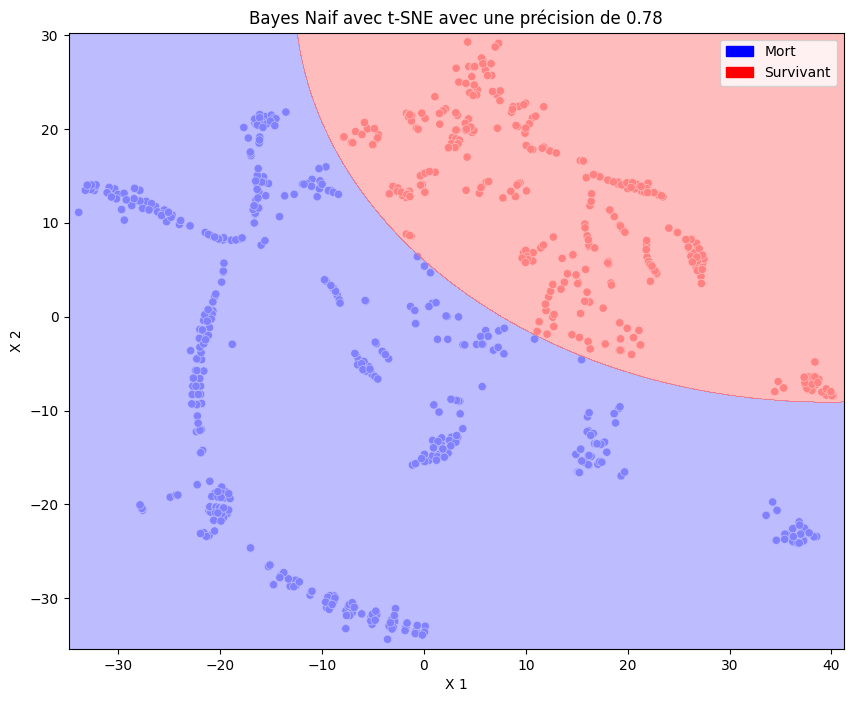

In [111]:
from sklearn.naive_bayes import GaussianNB


model_bayes = GaussianNB()
model_bayes.fit(X_train, y_train)

# Prédire les données de test
predictions_bayes = model_bayes.predict(X_test)
accuracy_bayes = accuracy_score(y_test, predictions_bayes)
conf_matrix_bayes = confusion_matrix(y_test, predictions_bayes)

# Apliquer le TSNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)


model_bayes.fit(X_tsne, y)
predictions_bayes_tsne = model_bayes.predict(X_tsne)
accuracy_bayes_tsne = accuracy_score(y, predictions_bayes_tsne)
conf_matrix_bayes_tsne = confusion_matrix(y, predictions_bayes_tsne)

# Afficher les points
plt.figure(figsize=(10, 8))


sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=predictions_bayes_tsne, palette='bwr', marker='o', legend=False)

# Afficher les frontières de décision
h = .02
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model_bayes.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)

# Ajouter une légende
label2 = ['Mort' if label == 0 else 'Survivant' for label in y]
unique_labels = list(set(label2))
legend_labels = ['Mort' if label == unique_labels[0] else 'Survivant' for label in label2]


colors = {'Mort': 'blue', 'Survivant': 'red'}
legend_patches = [mpatches.Patch(color=colors[label], label=label) for label in set(legend_labels)]

legend = Legend(plt.gca(), legend_patches, labels=set(legend_labels), loc='upper right')
plt.gca().add_artist(legend)

plt.title(f'Bayes Naif avec t-SNE avec une précision de {accuracy_bayes_tsne:.2f}')
plt.xlabel('X 1')
plt.ylabel('X 2')
plt.show()